# **Project Name**    - Netflix Movie and TV Show Clustering



##### **Project Type**    - Unsupervised Machine Learning.
##### **Developer**    - Nikhil Losarwar (Individual)

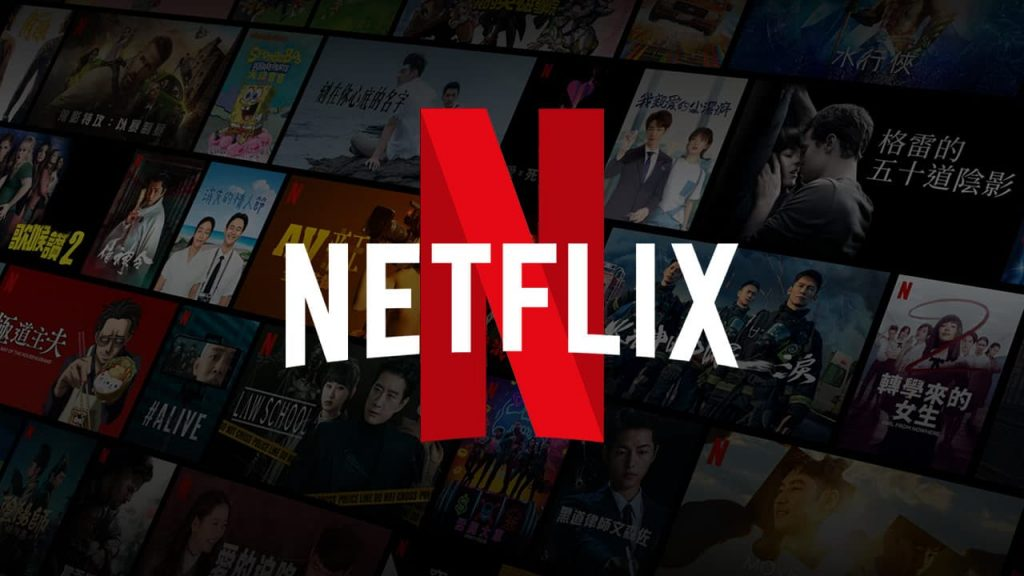



# **Project Summary -**

This project focuses on analyzing a Netflix dataset of movies and TV shows up to 2019, sourced from the third-party search engine Flixable. The primary objective is to enhance user experience through a content-based recommendation system, aiming to reduce subscriber churn for Netflix, which currently serves over 220 million users. By leveraging NLP techniques, the project seeks to group content into meaningful clusters, providing personalized recommendations that align with viewer preferences.

Beyond recommendation improvements, the dataset is analyzed to uncover key insights and emerging trends within the streaming entertainment industry.

The project follows a structured approach:

* **Data Preprocessing:** Addressed null values and managed nested columns (e.g., director, cast, listed_in, country) to facilitate better data visualization.

* **Attribute Binning:** Categorized the rating attribute into distinct categories such as adult, children's, family-friendly, and not rated.

* **Exploratory Data Analysis (EDA):** Conducted EDA to identify critical factors contributing to subscriber churn and gain deeper insights into content consumption patterns.

* **Clustering:** Utilized attributes like director, cast, country, genre, rating, and description, which were tokenized, preprocessed, and vectorized using the TF-IDF vectorizer. Dimensionality reduction was achieved through PCA for performance enhancement.

* **Clustering Algorithms**: Applied K-Means Clustering and Agglomerative Hierarchical Clustering algorithms, determining the optimal number of clusters (4 for K-Means, 2 for hierarchical clustering) through various evaluation metrics.

* **Recommendation System Development:** Built a content-based recommendation system using a cosine similarity matrix to deliver personalized content suggestions, thereby reducing subscriber churn.

This project not only contributes to improving user retention for Netflix but also offers valuable insights into content creation and consumption trends within the streaming industry.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies availiable on Netflix as of 2019. The dataset is collected from Flixable which is a third party Netflix search engine. In 2018 they released an interested report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service number of movies has decreased by more than 2,000 titles since 2010 while its number of Tv Shows has nearly tripled. It will be interesting to explore what other insights can be obtained from the same dataset

Integrating this dataset with other external dataset such as IMDB ratigs, rotten tomatoes can also provide many interesting findings.

In this project we are required to do :

*   Exploratory Data Analysis
*   understanding what type of content is availiable in different countries.

*   If Netflix has been increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matchmaking text-based feautures.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Let's imoprt needed Libraries and Modules

## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#libraries to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset

# Mounting to the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# let's Read the Netflix Dataset into the Dataframe 'df'
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Module-6-ML/Netflix Project/NETFLIX MOVIES AND TV SHOWS Dataset (Raw_Data).csv")

### Dataset First View

In [ ]:
# First 7 rows of df
df.head(7)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   
5       July 1, 2017          2016  TV-MA   1 Season   
6       June 1, 2020          2019  TV-MA     95 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...  
5  A genetics professor experiments with a treatm...  
6  After an awful accident, a couple admitted to ...

In [ ]:
# Last 7 rows of df
df.tail(7)

show_id     type                                    title      director  \
7780   s7781    Movie                                      Zoo  Shlok Sharma   
7781   s7782    Movie                                     Zoom  Peter Hewitt   
7782   s7783    Movie                                     Zozo   Josef Fares   
7783   s7784    Movie                                   Zubaan   Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan           NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts           NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS      Sam Dunn   

                                                   cast  \
7780  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...   
7781  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7780                                              India        July 1, 2018   
7781                                      United States    January 11, 2020   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7780          2018  TV-MA    94 min   
7781          2006     PG    88 min   
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7780   Dramas, Independent Movies, International Movies   
7781                 Children & Family Movies, Comedies   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7780  A drug dealer starts having doubts about his t...  
7781  Dragged from civilian life, a former superhero...  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [ ]:
# Random 7 rows of df
df.sample(7)

show_id     type                              title             director  \
7085   s7086  TV Show                            Tijuana                  NaN   
7344   s7345    Movie                 Unexpectedly Yours  Cathy Garcia-Molina   
4166   s4167    Movie                 Mokalik (Mechanic)       Kunle Afolayan   
3159   s3160    Movie        Jesus: Countdown to Calvary          Gerry Hoban   
1975   s1976    Movie  Elf Pets: Santa’s Reindeer Rescue          Chanda Bell   
1280   s1281    Movie                   Charlie's Angels                  McG   
959     s960    Movie                      Black Panther         Ryan Coogler   

                                                   cast  \
7085  Damián Alcázar, Tamara Vallarta, Rolf Petersen...   
7344  Sharon Cuneta, Robin Padilla, Julia Barretto, ...   
4166  Tooni Afolayan, Ayo Ogunshina, Dayo Akinpelu, ...   
3159                                    Hugh Bonneville   
1975  Brad Hyland, Drew Barber, Ashley Roberts, Lowr...   
1280  Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...   
959   Chadwick Boseman, Michael B. Jordan, Lupita Ny...   

                             country         date_added  release_year rating  \
7085                          Mexico      April 5, 2019          2019  TV-MA   
7344                     Philippines  November 26, 2020          2017  TV-14   
4166                         Nigeria  September 1, 2019          2019  TV-14   
3159  Ireland, United States, France      April 1, 2019          2018  TV-14   
1975                   United States   November 1, 2020          2020   TV-Y   
1280          United States, Germany    October 1, 2019          2000  PG-13   
959                    United States  September 4, 2018          2018  PG-13   

      duration                                          listed_in  \
7085  1 Season  Crime TV Shows, International TV Shows, Spanis...   
7344   121 min    Comedies, International Movies, Romantic Movies   
4166   100 min                       Dramas, International Movies   
3159    53 min                Documentaries, Faith & Spirituality   
1975    27 min                           Children & Family Movies   
1280    98 min                       Action & Adventure, Comedies   
959    135 min               Action & Adventure, Sci-Fi & Fantasy   

                                            description  
7085  When a prominent politician is murdered, the i...  
7344  A pair of former batchmates cross paths 30 yea...  
4166  A young boy's life shifts when he's sent to wo...  
3159  Host Hugh Bonneville traces Jesus' last days t...  
1975  Determined to help Santa get ready for his mer...  
1280  Three beauties use their looks, charm and mart...  
959   T'Challa, the superpowered new leader of the h...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

# let's print the Dimensions of the Dataframe
print("Number of Columns in the dataframe = ",df.shape[1])
print("Number of Rows in the dataframe = ",df.shape[0])

Number of Columns in the dataframe =  12
Number of Rows in the dataframe =  7787


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print("Duplicate Rows count = ",df.duplicated().sum())

Duplicate Rows count =  0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df_nulls = df.isna().sum().sort_values( ascending=False)

df_nulls

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

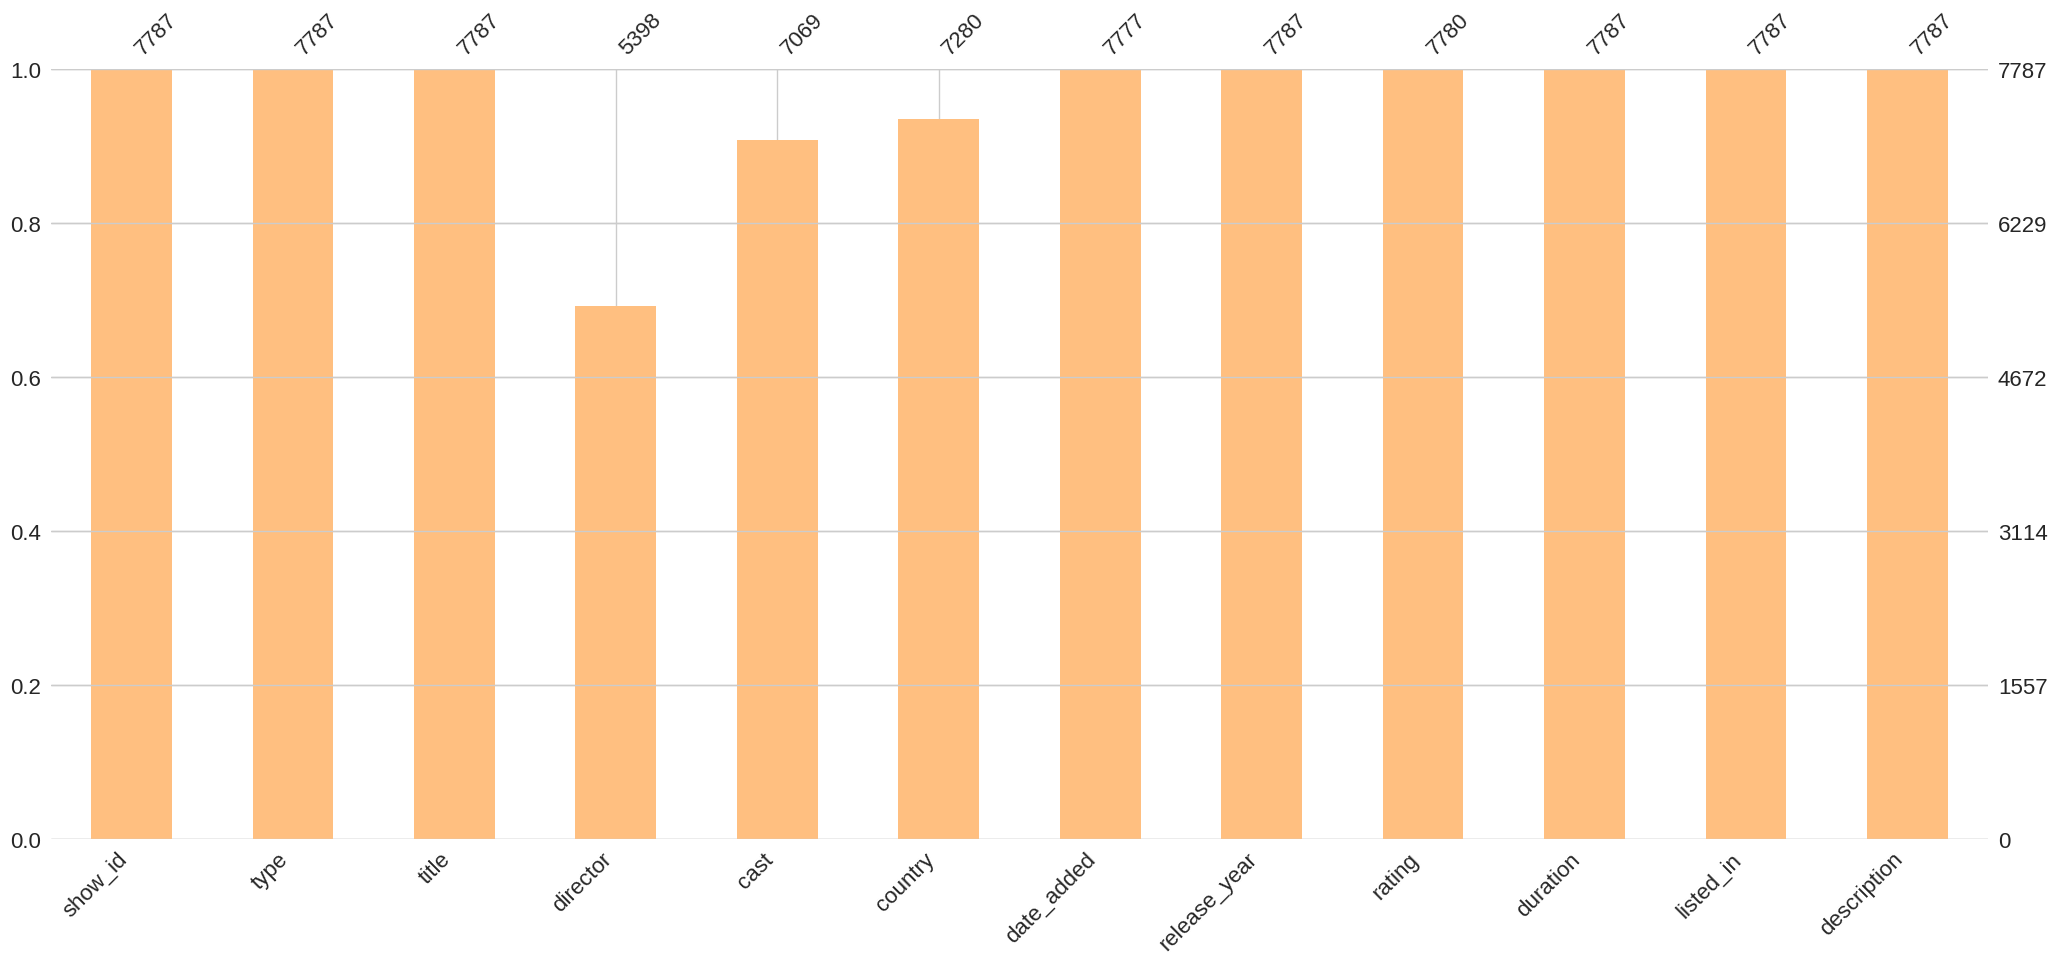

In [ ]:
# Visualizing code- Bar chart

import missingno as msno

msno.bar(df, color="#ffbf80")

In [ ]:
#  Missing values present in %

df_nulls_perct = ((df_nulls / len(df))*100).round(2)

print("Null Values % for every column :")
df_nulls_perct

Null Values % for every column :


director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

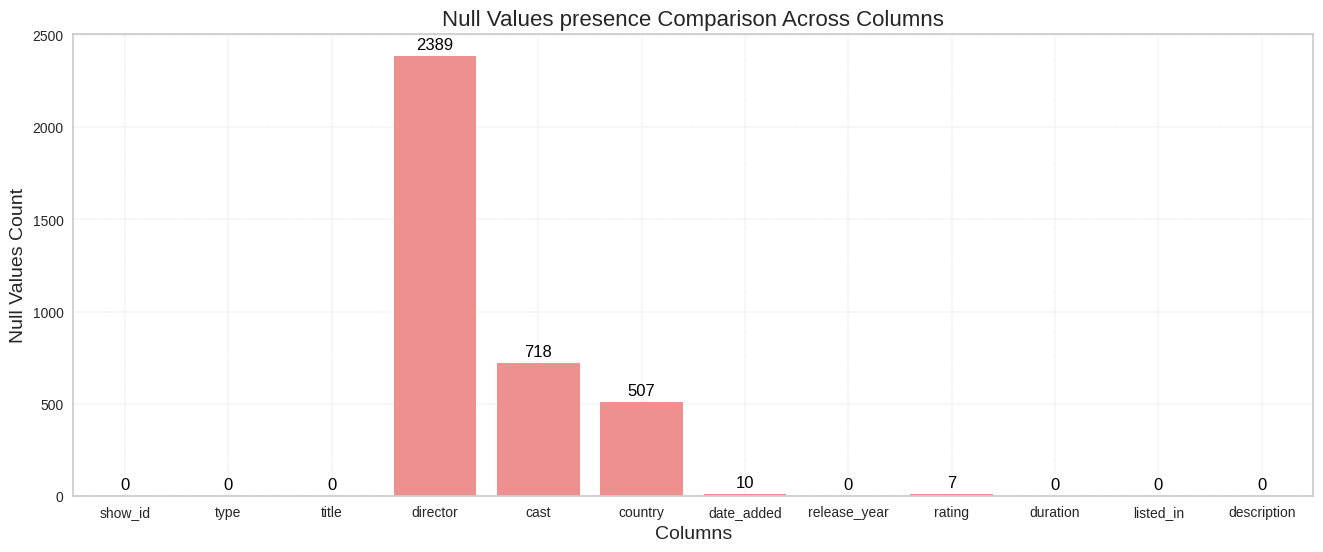

In [ ]:
# Visualizing code- Bar chart : Null Values in each column


plt.figure(figsize=(16, 6))

# Plotting the bar chart
plots = sns.barplot(x=df.columns, y=df.isna().sum(), color='#ff8080')

# Adding grid lines
plt.grid(linestyle='--', linewidth=0.3)

# Adding data labels in black
for bar in plots.patches:
    plots.annotate(f'{bar.get_height():.0f}',  # Formatting to remove decimals if not needed
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',
                   color='black')  # Setting label color to black

# Adding axis labels and title
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Null Values Count", fontsize=14)
plt.title("Null Values presence Comparison Across Columns", fontsize=16)

# Displaying the chart
plt.show()

### What did you know about your dataset?

* The dataset "Netflix Movies and TV Shows" comprises 12 columns, with only one column having an integer data type. It does not contain any duplicate values, but it does have null values in five columns: director, cast, country, date_added, and rating.

* This dataset provides a valuable resource for exploring trends in Netflix's range of movies and TV shows. Additionally, it can be utilized to develop clustering models to categorize similar titles together based on shared attributes such as genre, country of origin, and rating.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"List of Columns:\n{df.columns.to_list()}")

List of Columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Dataset Describe
df.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id:** Unique identifier for each movie/show.

2. **type:** Indicates whether the entry is a movie or a TV show.

3. **title:** Name of the movie or TV show.

4. **director:** Name of the director(s) of the movie or TV show.

5. **cast:** Names of the actors and actresses featured in the movie or TV show.

6. **country:** Country or countries where the movie or TV show was produced.

7. **date_added:** Date when the movie or TV show was added to Netflix.

8. **release_year:** Year when the movie or TV show was released.

9. **rating:** TV rating or movie rating of the movie or TV show

10. **duration:** Length of the movie or TV show in minutes or seasons.

11. **listed_in:** Categories or genres of the movie or TV show.

12. **description:** Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(f"The number of Unique Values in : \n{df.nunique()}")

The number of Unique Values in : 
show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64


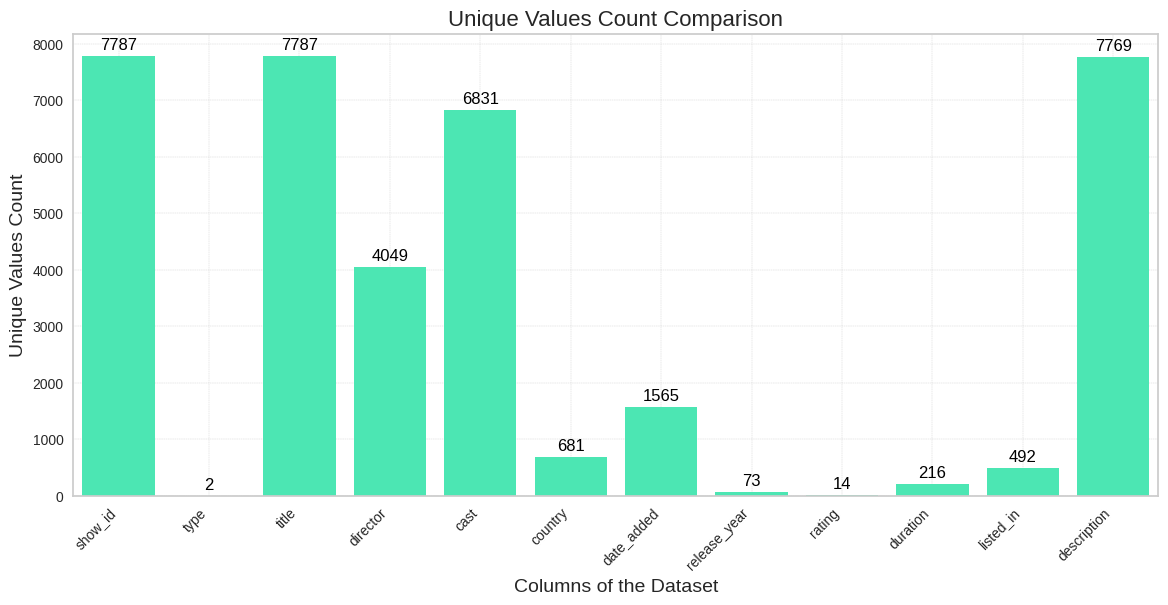

In [ ]:
# Visualizing code- Bar chart : Unique Values for each Column of dataset


# Calculate the unique value counts for each column
unique_counts = df.nunique()

plt.figure(figsize=(14, 6))

# Plotting the bar chart
plots = sns.barplot(x=unique_counts.index, y=unique_counts.values, color="#33ffbb")

# Adding grid lines
plt.grid(linestyle='--', linewidth=0.3)

# Adding data labels in black
for bar in plots.patches:
    plots.annotate(f'{int(bar.get_height())}',  # Formatting to show as integer
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points',
                   color='black')  # Setting label color to black

# Adding axis labels and title
plt.xlabel("Columns of the Dataset", fontsize=14)
plt.ylabel("Unique Values Count", fontsize=14)
plt.title("Unique Values Count Comparison", fontsize=16)

# Rotating x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Displaying the chart
plt.show()

## ***3. Data Wrangling***

### Data Wrangling Code

 In this Section, We will perform the key Data Wrangling Steps that will transform the dataset into the format that will be suitable and appropriate for further Data Analysis.



### Step-1 : Handling Missing Values

In [ ]:
# Let's find out the columns with Null Values
print("Null value count in each of the variable: ")                                                # simply prints a line consisting of 50 dashes, creates a visual separator or divider in text output
print(df.isna().sum().sort_values(ascending=False))

Null value count in each of the variable: 
director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64


#### Let's Explore each Column with Nulls, one by one.

In [ ]:
# Exploring Distinct values and their counts
# Considering Column = "date_added"

df['date_added'].value_counts()

date_added
January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: count, Length: 1565, dtype: int64

In [ ]:
# Exploring Distinct values and their counts
# Considering Column = 'rating'

df['rating'].value_counts()

rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

In [ ]:
# Exploring Distinct values and their counts
# Considering Column = 'country'

df['country'].value_counts()

country
United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: count, Length: 681, dtype: int64

In summary,
* Since 'date_added' and 'rating' has very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.

* We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high and we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.

* We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.

In [ ]:
# Let's Handle these Missing values


# imputing with unknown in null values of director and cast feature
df[['director', 'cast']] = df[['director', 'cast']].fillna('unknown')

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

print("Done...!!")

Done...!!


In [ ]:
# Let's Recheck whether there is any Nulls present across any column

print("Null value count in each of the variable: ")                                                # simply prints a line consisting of 50 dashes, creates a visual separator or divider in text output
print(df.isna().sum().sort_values(ascending=False))

Null value count in each of the variable: 
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [ ]:
print("Handling Missing values or Null is Successfully done...!!")

Handling Missing values or Null is Successfully done...!!


### Step-2 : Handling Inconsistency (nested column ['director', 'cast', 'listed_in', 'country']s)

In [ ]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [ ]:
# Unnesting 'Directors' column
dir_constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)

df1.sample(10)

title          Directors
7372                                The Princess Switch            unknown
3417  Jim & Andy: The Great Beyond - Featuring a Ver...        Chris Smith
6844                          The Distinguished Citizen      Gastón Duprat
354                                   After We Collided       Roger Kumble
2359                                Fisherman's Friends       Chris Foggin
1031                                         Black Rose   Alexander Nevsky
3118                                    Husbands in Goa     Saji Surendran
2482                                       Frozen River      Courtney Hunt
1851                                             Detour  Christopher Smith
3112                                    Hunter's Prayer    Jonathan Mostow

In [ ]:
# Unnesting 'cast' column
cast_constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)

df2.sample(10)

title             Actors
7075                      Black Friday  Aditya Srivastava
43924                        The Beast   Silvia Gallerano
18106                  Good Luck Chuck       Jessica Alba
15006                    Even the Rain     Vicente Romero
7483                         Bloodline      Jamie McShane
11557                              Dad    Olympia Dukakis
37715                     Romeo Ranjha        Rana Ranbir
28792                        MeatEater     Steven Rinella
4775                             Ayana          Karthik A
18261  Goosebumps 2: Haunted Halloween      Caleel Harris

In [ ]:
# Unnesting 'listed_in' column
listed_constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)

df3.sample(10)

title                     Genre
10328            Oye Lucky! Lucky Oye!                  Comedies
15699  Trailer Park Boys: Xmas Special                    Movies
2456   Bruno and Boots: The Wizzle War  Children & Family Movies
1771                         Before 30         Romantic TV Shows
13298                     The Apostate                  Comedies
3029           CIA: Comrade in America        Action & Adventure
16734                             Wolf    International TV Shows
6052               Holiday in the Wild           Romantic Movies
6879             Jealousy and medicine      International Movies
9098                    Mob Psycho 100               TV Comedies

In [ ]:
# Unnesting 'country' column
country_constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)

df4.sample(10)

title        Country
6162                                          Ravenous         Canada
4902         Middle School: The Worst Years of My Life  United States
8901                                  Tunisian Victory  United States
9484                                    You're My Boss    Philippines
46                                             Òlòtūré        Nigeria
8043                                       The Lobster    Netherlands
549   American Factory: A Conversation with the Obamas  United States
1831                                  Cops and Robbers  United States
4241                                  La Reina del Sur         Mexico
1540                                    Chal Mere Bhai          India

* Great, we have sucessfully separated the nested columns. Now let's just merge all the created dataframe into the single merged dataframe.

In [ ]:
# Let's Merge all the unnested columns.


# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Let's print
df7.head(10)

title            Actors Directors                   Genre Country
0    3%       João Miguel   unknown  International TV Shows  Brazil
1    3%       João Miguel   unknown               TV Dramas  Brazil
2    3%       João Miguel   unknown     TV Sci-Fi & Fantasy  Brazil
3    3%  Bianca Comparato   unknown  International TV Shows  Brazil
4    3%  Bianca Comparato   unknown               TV Dramas  Brazil
5    3%  Bianca Comparato   unknown     TV Sci-Fi & Fantasy  Brazil
6    3%      Michel Gomes   unknown  International TV Shows  Brazil
7    3%      Michel Gomes   unknown               TV Dramas  Brazil
8    3%      Michel Gomes   unknown     TV Sci-Fi & Fantasy  Brazil
9    3%   Rodolfo Valente   unknown  International TV Shows  Brazil

In [ ]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df = df7.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head(7)

title            Actors Directors                   Genre Country     type  \
0    3%       João Miguel   unknown  International TV Shows  Brazil  TV Show   
1    3%       João Miguel   unknown               TV Dramas  Brazil  TV Show   
2    3%       João Miguel   unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%  Bianca Comparato   unknown  International TV Shows  Brazil  TV Show   
4    3%  Bianca Comparato   unknown               TV Dramas  Brazil  TV Show   
5    3%  Bianca Comparato   unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
6    3%      Michel Gomes   unknown  International TV Shows  Brazil  TV Show   

        date_added  release_year rating   duration  \
0  August 14, 2020          2020  TV-MA  4 Seasons   
1  August 14, 2020          2020  TV-MA  4 Seasons   
2  August 14, 2020          2020  TV-MA  4 Seasons   
3  August 14, 2020          2020  TV-MA  4 Seasons   
4  August 14, 2020          2020  TV-MA  4 Seasons   
5  August 14, 2020          2020  TV-MA  4 Seasons   
6  August 14, 2020          2020  TV-MA  4 Seasons   

                                         description  
0  In a future where the elite inhabit an island ...  
1  In a future where the elite inhabit an island ...  
2  In a future where the elite inhabit an island ...  
3  In a future where the elite inhabit an island ...  
4  In a future where the elite inhabit an island ...  
5  In a future where the elite inhabit an island ...  
6  In a future where the elite inhabit an island ...

In [ ]:
print("List of Columns = ", list(df.columns))

List of Columns =  ['title', 'Actors', 'Directors', 'Genre', 'Country', 'type', 'date_added', 'release_year', 'rating', 'duration', 'description']


### Step-3 : Typecasting of attributes

In [ ]:
# Let's explore the data type of every Column

df.dtypes

title           object
Actors          object
Directors       object
Genre           object
Country         object
type            object
date_added      object
release_year     int64
rating          object
duration        object
description     object
dtype: object

In [ ]:
# let's perform Typecasting as per needed


# Typecasting duration into integer by removing 'min' and 'season' from the end
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)

# Typecasting string object to datetime object of date_added column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# let's recheck the data types
df.dtypes


title                   object
Actors                  object
Directors               object
Genre                   object
Country                 object
type                    object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                 int64
description             object
dtype: object

In [ ]:
print("Typecasting is Successfully Done...!!")

Typecasting is Successfully Done...!!


In [ ]:
# Extracting Weekday, day, month and year from date_added column
df["day_added"]= df["date_added"].dt.day
df['Weekday'] = df['date_added'].dt.day_name()
df["month_added"]= df["date_added"].dt.month
df["year_added"]= df["date_added"].dt.year



# let's Check the Columns now
print("List of Columns:\n", list(df.columns))

List of Columns:
 ['title', 'Actors', 'Directors', 'Genre', 'Country', 'type', 'date_added', 'release_year', 'rating', 'duration', 'description', 'day_added', 'Weekday', 'month_added', 'year_added']


In [ ]:
# let's check the newly added colums

df[['day_added', 'month_added', 'year_added', 'Weekday']]

day_added  month_added  year_added Weekday
0            14.0          8.0      2020.0  Friday
1            14.0          8.0      2020.0  Friday
2            14.0          8.0      2020.0  Friday
3            14.0          8.0      2020.0  Friday
4            14.0          8.0      2020.0  Friday
...           ...          ...         ...     ...
175802        1.0          3.0      2020.0  Sunday
175803        1.0          3.0      2020.0  Sunday
175804        1.0          3.0      2020.0  Sunday
175805        1.0          3.0      2020.0  Sunday
175806        1.0          3.0      2020.0  Sunday

[175807 rows x 4 columns]

In [ ]:
df['day_added'].value_counts()

day_added
1.0     47858
15.0    14392
16.0     6552
31.0     5249
5.0      5130
2.0      5091
20.0     4890
8.0      4754
19.0     4608
10.0     4537
30.0     4374
26.0     4191
25.0     4013
7.0      4007
4.0      3789
6.0      3731
21.0     3641
28.0     3556
27.0     3526
14.0     3520
22.0     3506
18.0     3442
23.0     3437
13.0     3036
9.0      3014
12.0     2937
24.0     2877
17.0     2869
29.0     2603
3.0      2566
11.0     2523
Name: count, dtype: int64

### Step-4 : Binning of rating attribute

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA:** This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R:** This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13:** This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14:** This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG:** This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR:** This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G:** This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y:** This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

**TV-Y7:** This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG:** This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G:** This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17:** This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV:** This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR:** This stands for "Unrated."

It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

In summary, after Binning-

**Adult Content:** TV-MA, NC-17, R

**Children Content:**  TV-PG, PG, TV-G, G

**Teen Content:**  PG-13, TV-14

**Family-friendly Content:**  TV-Y, TV-Y7, TV-Y7-FV

**Not Rated:**  NR, UR

In [ ]:
# Let's do Binning the values in the rating column
rating_map = {

    'TV-MA': 'Adults',
    'R': 'Adults',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'TV-PG': 'Older Kids',
    'NR': 'Adults',
    'TV-G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'NC-17': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Adults'
}

df['rating'].replace(rating_map, inplace = True)

# renamaing the column for clarity
df.rename(columns={'rating': 'age_rating'}, inplace=True)

df['age_rating'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
# let's print
df.head()

title            Actors Directors                   Genre Country     type  \
0    3%       João Miguel   unknown  International TV Shows  Brazil  TV Show   
1    3%       João Miguel   unknown               TV Dramas  Brazil  TV Show   
2    3%       João Miguel   unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%  Bianca Comparato   unknown  International TV Shows  Brazil  TV Show   
4    3%  Bianca Comparato   unknown               TV Dramas  Brazil  TV Show   

  date_added  release_year age_rating  duration  \
0 2020-08-14          2020     Adults         4   
1 2020-08-14          2020     Adults         4   
2 2020-08-14          2020     Adults         4   
3 2020-08-14          2020     Adults         4   
4 2020-08-14          2020     Adults         4   

                                         description  day_added Weekday  \
0  In a future where the elite inhabit an island ...       14.0  Friday   
1  In a future where the elite inhabit an island ...       14.0  Friday   
2  In a future where the elite inhabit an island ...       14.0  Friday   
3  In a future where the elite inhabit an island ...       14.0  Friday   
4  In a future where the elite inhabit an island ...       14.0  Friday   

   month_added  year_added  
0          8.0      2020.0  
1          8.0      2020.0  
2          8.0      2020.0  
3          8.0      2020.0  
4          8.0      2020.0

In [ ]:
df['age_rating'].value_counts()

age_rating
Adults        88127
Teens         52391
Older Kids    28165
Kids           7124
Name: count, dtype: int64

### Step-5 : Segregating Content into categories such as Movies and TV Shows

In [ ]:
# Let's Segregat the content

df_movies = df[df['type']== 'Movie']
df_tvshows = df[df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 15) (49728, 15)


In [ ]:
# After segregating, let's print the-

# Size of Movies dataset
print("Size of Movies Dataframe = ", df_movies.shape )

# Size of TV Shows dataset
print("Size of TV Shows  Dataframe = ", df_tvshows.shape)

Size of Movies Dataframe =  (126079, 15)
Size of TV Shows  Dataframe =  (49728, 15)


### What all manipulations have you done and insights you found?

**Data Wrangling Summary:**

In our data wrangling process, we have conducted a series of manipulations across five distinct sections to clean and prepare the data for analysis. Here's a detailed overview of the steps we undertook:

**1. Handling Missing Values:**

We addressed missing values by imputing or dropping them as follows:

* For the director and cast columns, we filled missing entries with the placeholder 'Unknown' to ensure that all records have a value in these fields.

* The country column was imputed with its mode, which is the most frequently occurring value, to replace the missing values with a representative entry.

* We opted to drop rows with missing values in the date_added and rating columns, as these had a relatively low percentage of null entries and their removal had minimal impact on the dataset.


**2. Unnesting Values:**

We performed unnesting operations on the following columns to better handle the multi-valued data:
* director
* cast
* listed_in
* country

By splitting these columns into separate rows for each value, we were able to create new dataframes for each feature. These dataframes were then merged back into the original dataset using a left join, allowing us to isolate and analyze each feature's values more effectively.

**3. Typecasting Features:**

We converted data types to ensure consistency and suitability for analysis:

* The duration column was typecast to an integer after removing non-numeric text (e.g., "min" and "seasons"), which standardized the duration values for better numerical analysis.

* The date_added column was converted to a DateTime format, facilitating time-based operations and comparisons in the required format.


**4. Categorizing Ratings:**

We categorized the rating column, which contained various coded categories, into five bins to simplify analysis:

* **Adult:** TV-MA, NC-17
* **Restricted:**  R, UR
* **Teen:**  PG-13, TV-14
* **All Ages:**  TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG
* **Not Rated:**  NR

This categorization allows for clearer insights into content ratings and facilitates more straightforward comparison and analysis.


**5. Data Segmentation:**

Finally, we split the dataset into two separate dataframes to focus on different types of content:

* 'df_movies' - contains only movie entries.
* 'df_tvshows' - contains only TV show entries.

This segmentation supports targeted analysis and ensures that insights can be derived separately for movies and TV shows.




Overall, these data wrangling steps have been instrumental in preparing the dataset for in-depth analysis, ensuring that the data is clean, well-structured, and ready for further exploration.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 : Top 10 Countries with Highest Netflix Shows or Content**

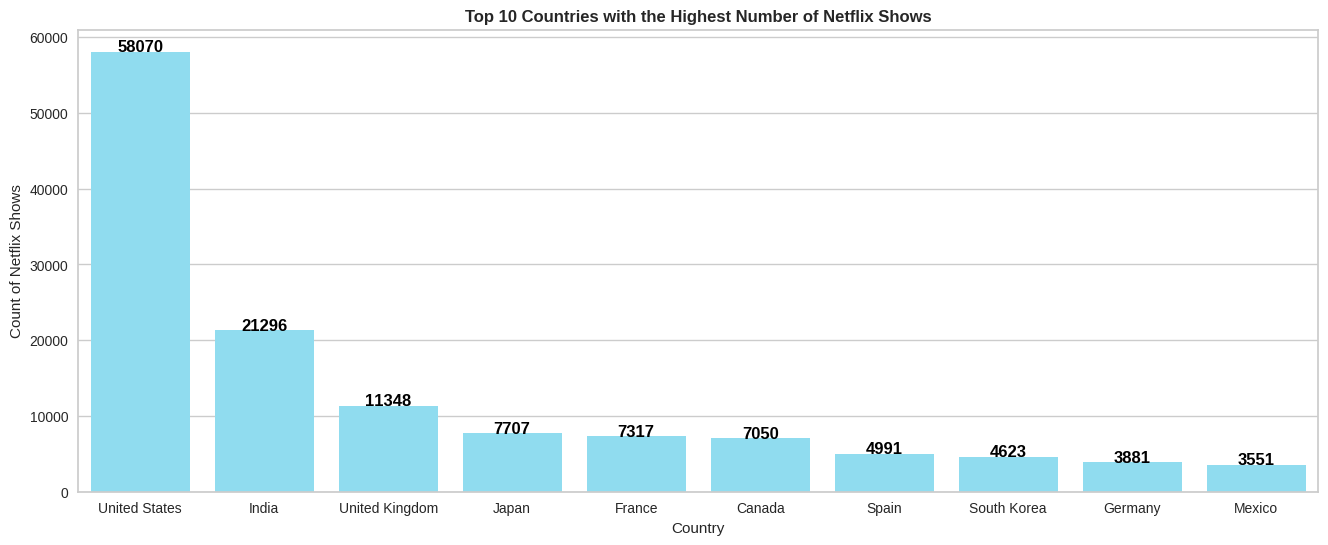

In [ ]:
# Chart - 1


# Grouping by 'Country' and counting the number of shows
country_counts = df.groupby('Country').size().sort_values(ascending=False).head(10).reset_index(name='Count')


# visualization code

# Plotting the vertical bar chart
plt.figure(figsize=(16, 6))
sns.barplot(x='Country', y='Count', data=country_counts, color='#80e5ff')

# Adding data labels
for index, value in enumerate(country_counts['Count']):
    plt.text(index, value + 5, str(value), ha='center', color='black', weight='bold')

# Adding title and labels
plt.title('Top 10 Countries with the Highest Number of Netflix Shows', weight='bold')
plt.xlabel('Country')
plt.ylabel('Count of Netflix Shows')

plt.show()


##### 1. Why did you pick the specific chart?

**Ans:** The vertical bar chart was chosen because it effectively visualizes the comparison of categorical data—in this case, the number of Netflix shows produced by each country. Bar charts are ideal for showing the frequency or count of categories, making it easy to identify which countries contribute the most content to Netflix.

##### 2. What is/are the insight(s) found from the chart?

**Ans:**  The countries leading in Netflix content production can be easily identified. Typically, countries like the United States, India, and the United Kingdom might dominate the list, showing their significant contribution to the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:**
Yes, these insights can help create a positive business impact:

* **Content Strategy:** Knowing which countries produce the most content can help Netflix tailor its content acquisition and production strategies. For example, if the top countries are consistently performing well, Netflix might consider investing more in content from these regions.

* **Market Expansion:** Understanding the content contribution by country can guide Netflix in market expansion decisions. If a country with significant content production isn't already a major market, Netflix could explore growth opportunities there.


The chart doesn't directly suggest negative growth. However, if it shows that most content comes from just a few countries, it might indicate a lack of diversity in Netflix's library. This could potentially alienate users from other regions, leading to negative customer experiences. While the insight itself isn't negative, it highlights the risk of over-relying on content from a limited number of countries.

#### **Chart - 2 : Bottom 10 Countries with lowest Netflix Movies**

In [ ]:
# Data Wrangling

# Filtering the DataFrame for movies only
movies_df = df[df['type'] == "Movie"]

# Grouping by country and counting the number of movies per country
country_movie_counts = movies_df.groupby('Country')['title'].count().reset_index()

# Sorting the counts to get the bottom 10 countries
bottom_10_countries = country_movie_counts.nsmallest(10, 'title')

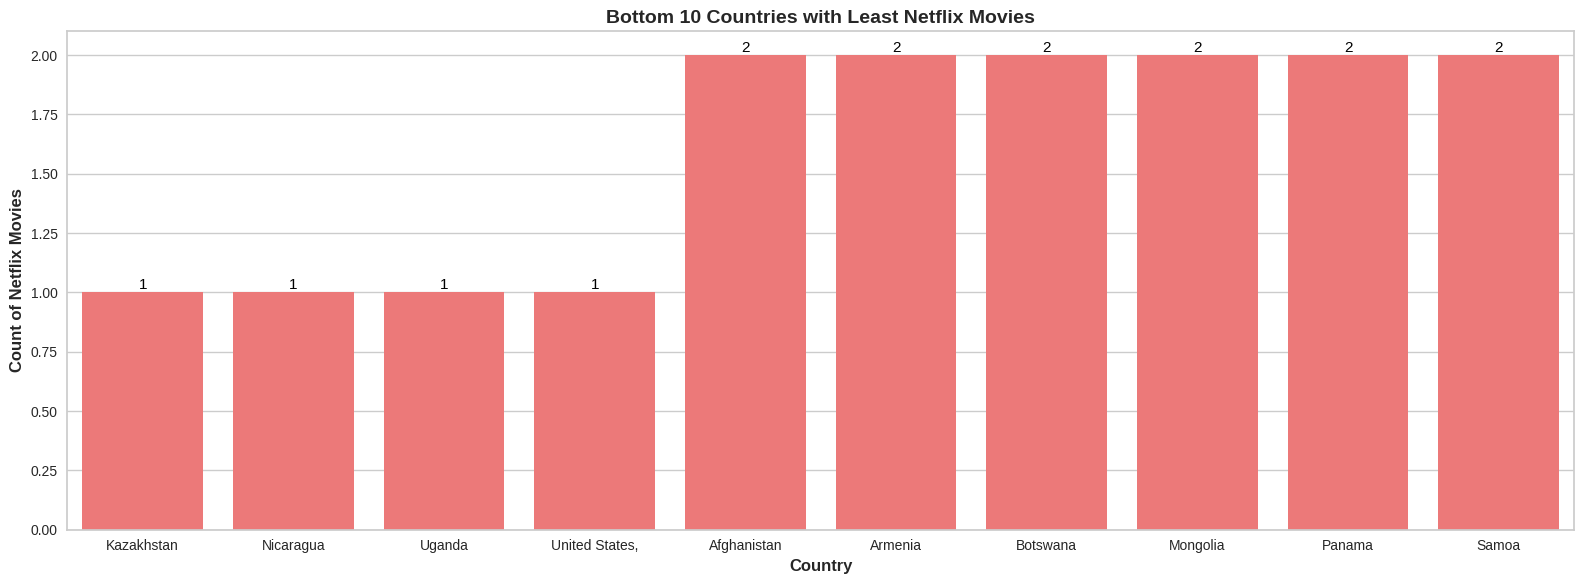

In [ ]:
# Chart - 2  visualization code


# Plotting the vertical bar chart
plt.figure(figsize=(16, 6))
sns.barplot(x='Country', y='title', data=bottom_10_countries, color="#ff6666")
plt.xlabel('Country', fontsize=12, weight='bold')
plt.ylabel('Count of Netflix Movies', fontsize=12, weight='bold')
plt.title('Bottom 10 Countries with Least Netflix Movies', fontsize=14, weight='bold')

# Adding data labels in black
for index, value in enumerate(bottom_10_countries['title']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** I chose this bar chart because it effectively displays the countries with the fewest Netflix movies, making it easy to compare the content availability across these countries. The visual format highlights the disparities in movie content distribution.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** I chose this bar chart because it effectively displays the countries with the fewest Netflix movies, making it easy to compare the content availability across these countries. The visual format highlights the disparities in movie content distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** These insights can help Netflix identify underserved markets where expanding movie offerings could boost subscriber engagement and satisfaction. However, the chart also highlights a potential risk: if these markets continue to have limited content, it could lead to customer dissatisfaction and churn, negatively impacting growth.

#### **Chart - 3 : Bottom 10 Countries with lowest Netflix TV Shows**

In [ ]:
# Data Wrangling

# Filtering the DataFrame for movies only
movies_df = df[df['type'] == "TV Show"]

# Grouping by country and counting the number of movies per country
country_movie_counts = movies_df.groupby('Country')['title'].count().reset_index()

# Sorting the counts to get the bottom 10 countries
bottom_10_countries = country_movie_counts.nsmallest(10, 'title')

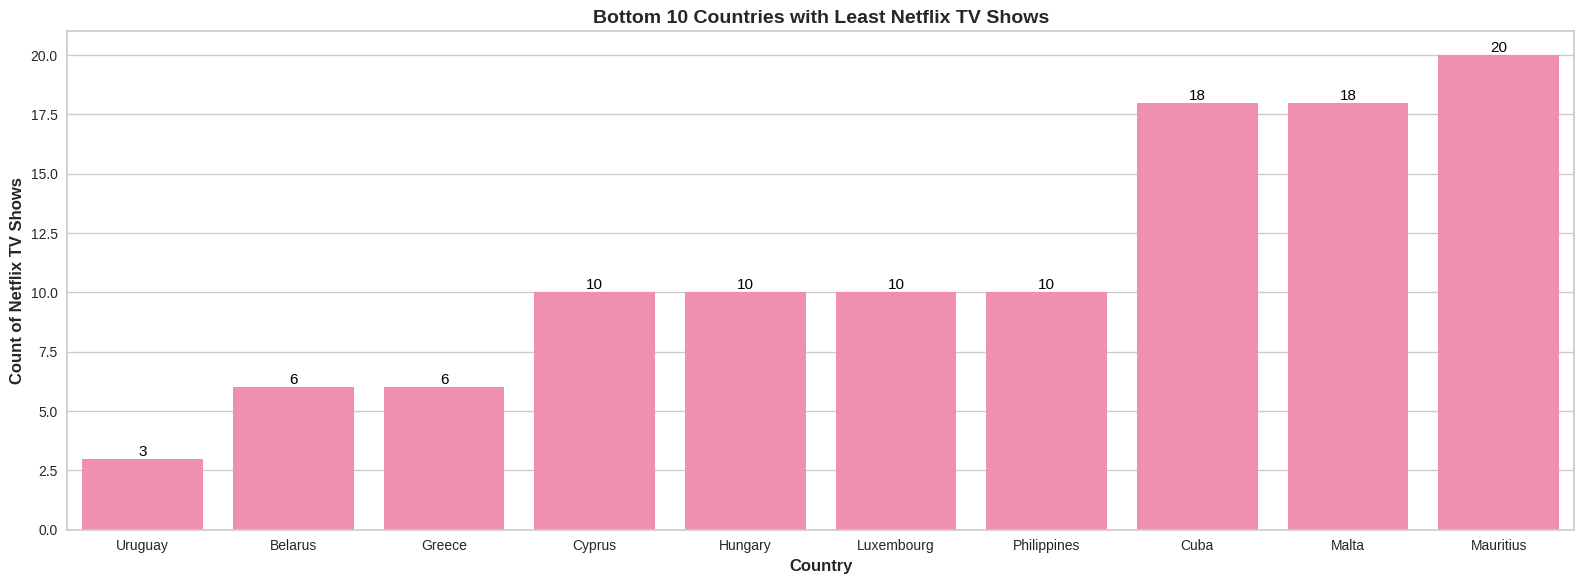

In [ ]:
# Chart - 3 visualization code


# Plotting the vertical bar chart
plt.figure(figsize=(16, 6))
sns.barplot(x='Country', y='title', data=bottom_10_countries, color="#ff80aa")
plt.xlabel('Country', fontsize=12, weight='bold')
plt.ylabel('Count of Netflix TV Shows', fontsize=12, weight='bold')
plt.title('Bottom 10 Countries with Least Netflix TV Shows', fontsize=14, weight='bold')

# Adding data labels in black
for index, value in enumerate(bottom_10_countries['title']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** The bar chart was chosen because it provides a clear visual comparison of the countries with the fewest TV shows on Netflix. This format allows for an easy identification of content gaps in Netflix's TV show offerings across different countries.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The chart reveals that certain countries have a notably lower number of TV shows available on Netflix. This indicates that Netflix's TV show content is not evenly distributed, with some countries having limited access to such content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** These insights could positively impact the business by guiding Netflix to expand its TV show offerings in countries with fewer shows, potentially increasing user satisfaction and subscription rates in these regions. However, the limited availability of TV shows in these countries might currently be a drawback, leading to user dissatisfaction or churn, especially if viewers in these markets feel underserved compared to other regions.

#### **Chart - 4 : Proportion % of Netflix Content by Type**

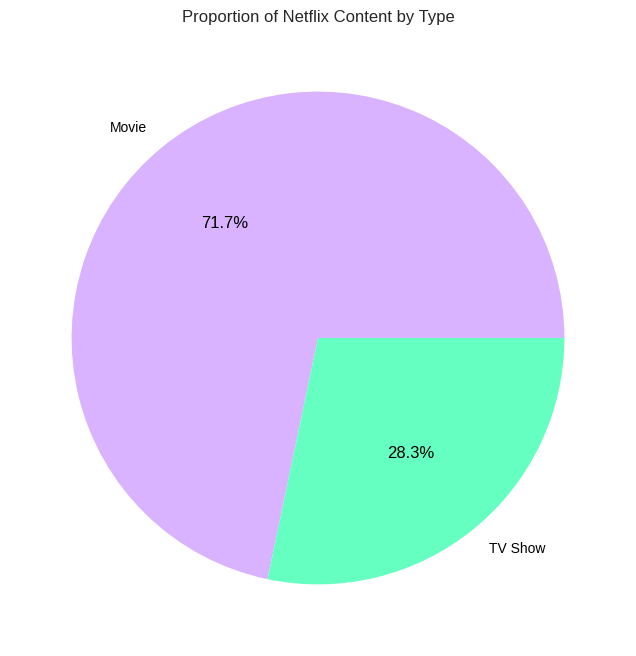

In [ ]:
# Chart - 4 visualization code


# Grouping and counting the content type
content_type_counts = df['type'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(content_type_counts, labels=content_type_counts.index, colors=["#d9b3ff", "#66ffc2"], autopct='%1.1f%%', textprops={'color': 'black'})
plt.title('Proportion of Netflix Content by Type')
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** The pie chart was selected because it effectively displays the proportion of different content types (Movies vs. TV Shows) in a visually intuitive manner. It allows for an immediate understanding of how Netflix's content is divided between these two categories.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The chart shows the distribution of Netflix content between Movies and TV Shows. It helps in understanding the balance of content types on the platform and reveals whether Netflix leans more towards one type of content over the other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** Understanding the content distribution helps in making strategic decisions about content acquisition and development. If one type of content dominates significantly, Netflix might choose to balance the offerings to cater to a broader audience. For instance, if TV Shows dominate, there might be an opportunity to invest more in movies to attract users who prefer that format. Conversely, if one content type is heavily underrepresented, it might indicate a need for improvement in that area to avoid potential customer dissatisfaction.

#### **Chart - 5 : Proportion % of Netflix Movies by Audience Type / Age Ratings**

In [ ]:
print("Types of Age Rating or Audiance type = ")
df['age_rating'].value_counts()

Types of Age Rating or Audiance type = 


age_rating
Adults        88127
Teens         52391
Older Kids    28165
Kids           7124
Name: count, dtype: int64

In [ ]:
# Filter the DataFrame to include only movies
movies_df = df[df['type'] == 'Movie']

# Group by age rating and count the number of movies in each category
age_rating_counts = movies_df['age_rating'].value_counts()

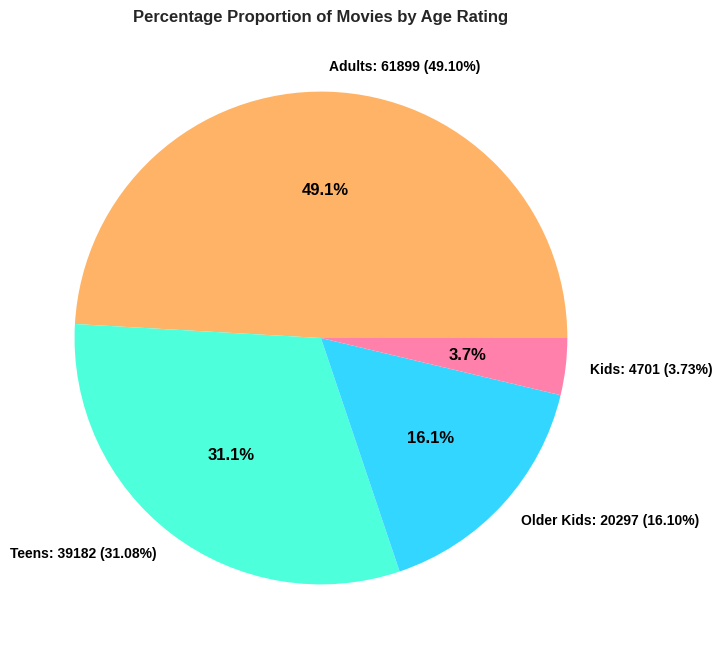

In [ ]:
# Chart - 5

# visualization code

# Define the color palette with the recently used colors
colors = ["#ffb366", "#4dffdb", "#33d6ff", "#ff80aa"]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    age_rating_counts,
    labels=[f'{label}: {count} ({(count/sum(age_rating_counts)*100):.2f}%)' for label, count in age_rating_counts.items()],
    colors=colors,
    autopct='%1.1f%%',
    textprops={'color': 'black', 'weight': 'bold'}
)
plt.title('Percentage Proportion of Movies by Age Rating', weight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

**Ans:** The pie chart is an effective visualization to showcase the proportion of different age ratings for movies. It provides a clear and immediate understanding of how the content is distributed across age categories.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The chart reveals the relative distribution of movies across various age ratings, showing which categories dominate Netflix's movie offerings. This can highlight if the platform is heavily geared towards certain age groups.

Approximately 20% of the movies on Netflix are rated for children.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** The insights suggest that Netflix's movie library is balanced, with 49% of content aimed at adults, 31% at teens, and 20% at children. This variety supports a wide audience, likely enhancing user satisfaction across different age groups, which can positively impact customer retention and growth.

However, the high percentage of adult content could pose a risk if not balanced with offerings for younger audiences. If family-friendly or teen content is insufficient, it might limit Netflix's appeal to families or younger viewers, potentially leading to a negative impact on those demographic segments.

#### **Chart - 6 : Proportion % of Netflix TV Shows by Audience Type / Age Ratings**

In [ ]:
# Filter the DataFrame to include only movies
TVshows_df = df[df['type'] == 'TV Show']

# Group by age rating and count the number of movies in each category
age_rating_counts = TVshows_df['age_rating'].value_counts()

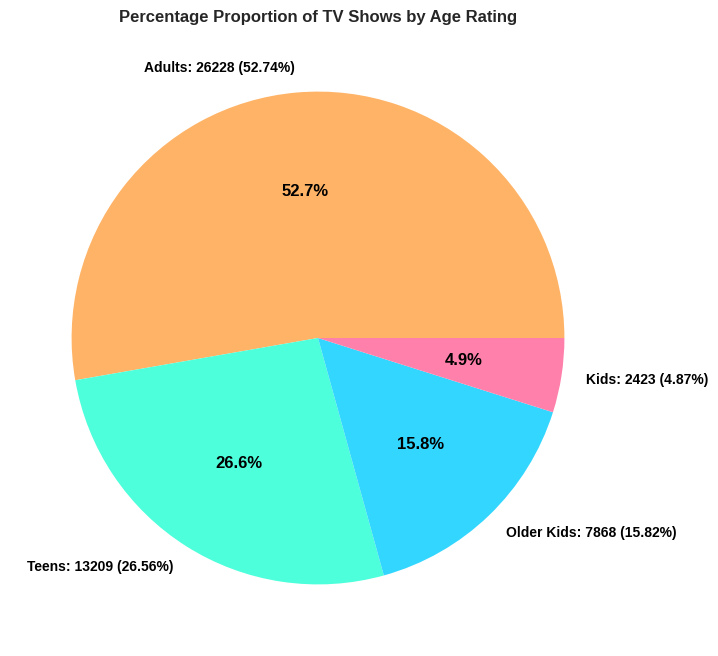

In [ ]:
# Chart - 5

# visualization code

# Define the color palette with the recently used colors
colors = ["#ffb366", "#4dffdb", "#33d6ff", "#ff80aa"]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    age_rating_counts,
    labels=[f'{label}: {count} ({(count/sum(age_rating_counts)*100):.2f}%)' for label, count in age_rating_counts.items()],
    colors=colors,
    autopct='%1.1f%%',
    textprops={'color': 'black', 'weight': 'bold'}
)
plt.title('Percentage Proportion of TV Shows by Age Rating', weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** A pie chart was chosen to clearly display the percentage distribution of TV shows by age rating. It effectively communicates the proportion of content aimed at different age groups, making it easy to compare the focus of Netflix’s TV show offerings.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The chart reveals that a majority (53%) of Netflix’s TV show content is aimed at adults, followed by 27% targeting teens and 20% for children. This suggests that Netflix prioritizes adult-oriented TV shows, while still catering to younger audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** The insight that 53% of TV show content is aimed at adults could positively impact Netflix by reinforcing its appeal to an adult audience, which is a significant user base. However, the lower proportion of content for teens and children (27% and 20%, respectively) might limit Netflix's reach in these demographics. If the content for younger audiences is insufficient, it could reduce Netflix’s attractiveness to families, potentially leading to lower engagement or subscription rates in those segments.

#### **Chart - 7 : Yearly Trend of content listing on the Netflix**

In [ ]:
df_copy = df[['title', 'type','year_added']].copy()

df_copy.isnull().sum()

title            0
type             0
year_added    1588
dtype: int64

In [ ]:
# Drop rows where the specified column has null values
df_copy = df_copy.dropna(subset=['year_added'])

# let's check the Null values count for columns
df_copy.isnull().sum()

title         0
type          0
year_added    0
dtype: int64

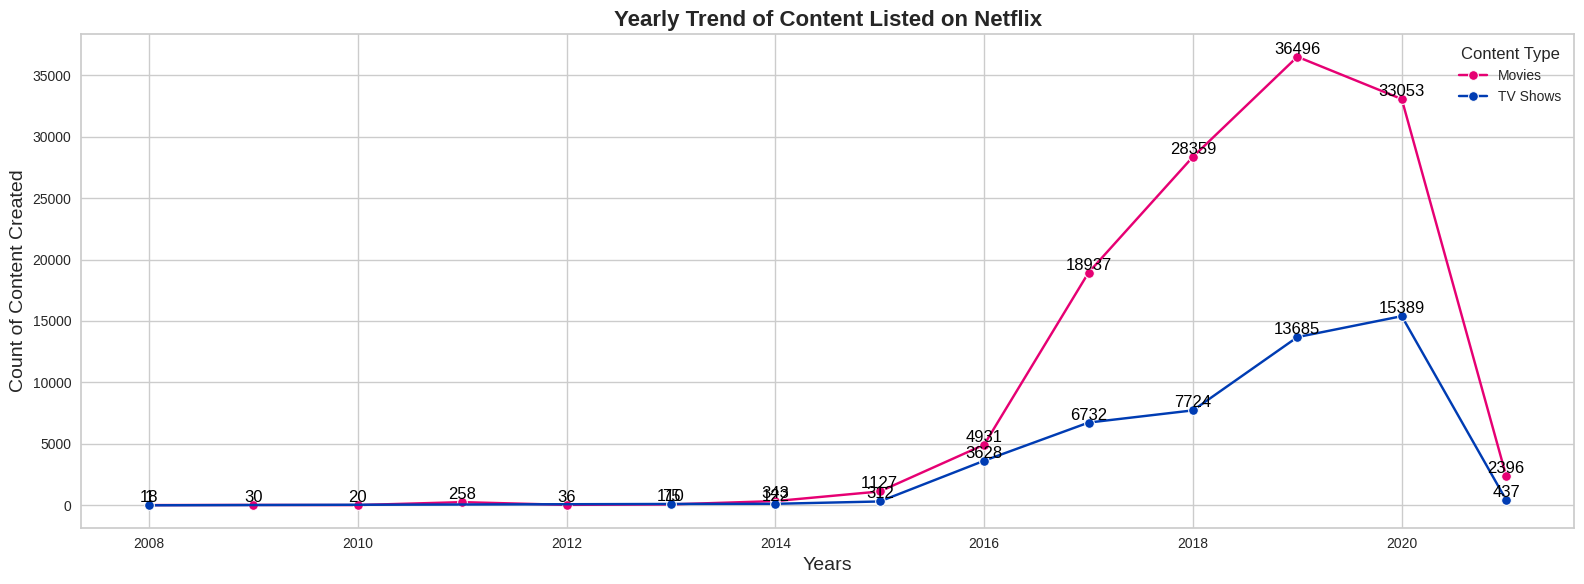

In [ ]:
# Chart - 7 visualization code

# Data wrangling: Grouping the data by 'release_year' and 'type', then counting the entries
df_yearly_trend = df_copy.groupby(['year_added', 'type']).size().reset_index(name='count')

# Plotting the line chart
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_yearly_trend[df_yearly_trend['type'] == 'Movie'],
             x='year_added', y='count', marker='o', label='Movies', color='#e60073')
sns.lineplot(data=df_yearly_trend[df_yearly_trend['type'] == 'TV Show'],
             x='year_added', y='count', marker='o', label='TV Shows', color='#003cb3')

# Adding data labels
for i in range(df_yearly_trend[df_yearly_trend['type'] == 'Movie'].shape[0]):
    plt.text(x=df_yearly_trend[df_yearly_trend['type'] == 'Movie']['year_added'].iloc[i],
             y=df_yearly_trend[df_yearly_trend['type'] == 'Movie']['count'].iloc[i],
             s=df_yearly_trend[df_yearly_trend['type'] == 'Movie']['count'].iloc[i],
             color='black', ha='center', va='bottom')

for i in range(df_yearly_trend[df_yearly_trend['type'] == 'TV Show'].shape[0]):
    plt.text(x=df_yearly_trend[df_yearly_trend['type'] == 'TV Show']['year_added'].iloc[i],
             y=df_yearly_trend[df_yearly_trend['type'] == 'TV Show']['count'].iloc[i],
             s=df_yearly_trend[df_yearly_trend['type'] == 'TV Show']['count'].iloc[i],
             color='black', ha='center', va='bottom')

# Adding titles and labels
plt.title('Yearly Trend of Content Listed on Netflix', fontsize=16, weight='bold')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Count of Content Created', fontsize=14)
plt.legend(title='Content Type')

# Display the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** A line chart was chosen because it is effective in showing trends over time. The two lines representing Movies and TV Shows allow for an easy comparison of how the volume of each type of content has evolved on Netflix over the years.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The chart may reveal trends such as an increase in the production of TV Shows over recent years or a possible decline in the release of Movies. This helps to understand how Netflix's content strategy has shifted over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** The insights from this chart can positively impact business decisions by identifying which type of content is gaining popularity. For instance, if TV Show production has seen a steady rise, Netflix might continue to invest in that area. Conversely, a decline in Movie releases might indicate a need to reassess content strategies. If the trend shows a significant decline in either category, it could suggest a potential area of concern that might need addressing to avoid negative growth.

#### **Chart - 8 : Monthly Trend of Content Listing on the Netflix**

In [ ]:
# Data wrangling: Exclude nulls and group by 'month_added' and 'type', then count the entries
df_monthly_trend = df[df['month_added'].notnull()].groupby(['month_added', 'type']).size().reset_index(name='count')

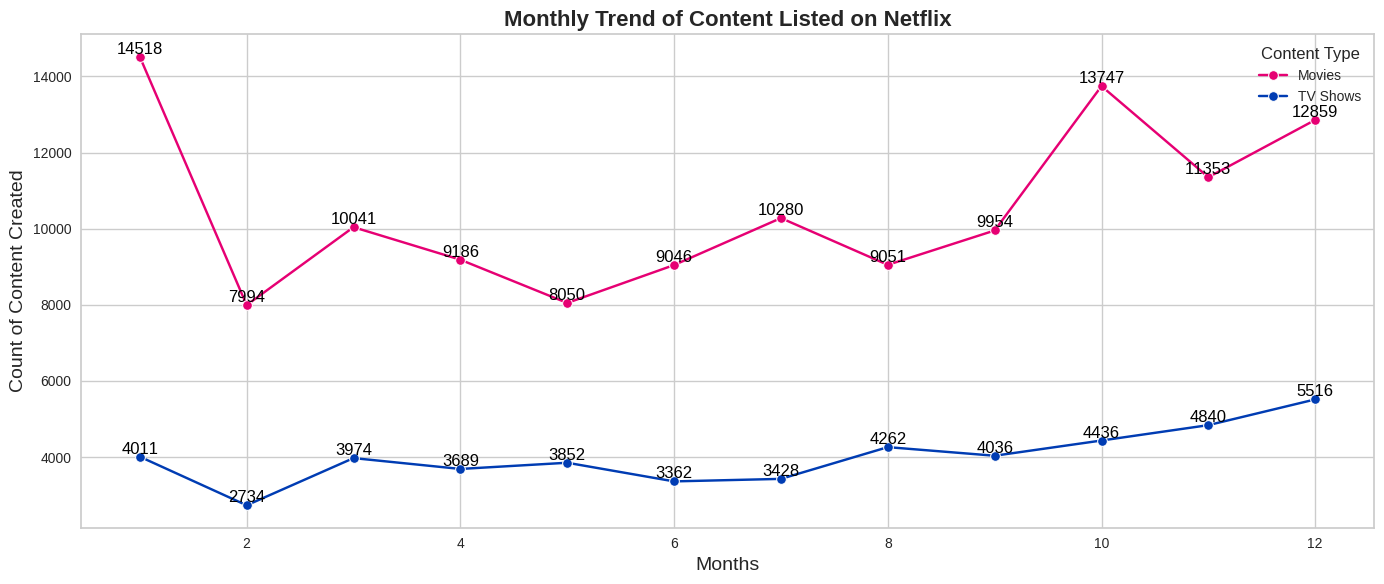

In [ ]:
# Chart - 8

# visualization code


# Plotting the line chart
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_monthly_trend[df_monthly_trend['type'] == 'Movie'],
             x='month_added', y='count', marker='o', label='Movies', color='#e60073')
sns.lineplot(data=df_monthly_trend[df_monthly_trend['type'] == 'TV Show'],
             x='month_added', y='count', marker='o', label='TV Shows', color='#003cb3')

# Adding data labels
for i in range(df_monthly_trend[df_monthly_trend['type'] == 'Movie'].shape[0]):
    plt.text(x=df_monthly_trend[df_monthly_trend['type'] == 'Movie']['month_added'].iloc[i],
             y=df_monthly_trend[df_monthly_trend['type'] == 'Movie']['count'].iloc[i],
             s=df_monthly_trend[df_monthly_trend['type'] == 'Movie']['count'].iloc[i],
             color='black', ha='center', va='bottom')

for i in range(df_monthly_trend[df_monthly_trend['type'] == 'TV Show'].shape[0]):
    plt.text(x=df_monthly_trend[df_monthly_trend['type'] == 'TV Show']['month_added'].iloc[i],
             y=df_monthly_trend[df_monthly_trend['type'] == 'TV Show']['count'].iloc[i],
             s=df_monthly_trend[df_monthly_trend['type'] == 'TV Show']['count'].iloc[i],
             color='black', ha='center', va='bottom')

# Adding

# Adding titles and labels
plt.title('Monthly Trend of Content Listed on Netflix', fontsize=16, weight='bold')
plt.xlabel('Months', fontsize=14)
plt.ylabel('Count of Content Created', fontsize=14)
plt.legend(title='Content Type')

# Display the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:**  The line chart is chosen to effectively visualize the trends in content listing over time. By plotting the monthly data, it provides a clear view of how the volume of content added to Netflix fluctuates throughout the year for both movies and TV shows. The dual-line approach allows for direct comparison between the two content types across different months.

##### 2. What is/are the insight(s) found from the chart?

**Ans:**  Every Month Number of TV shows listed on Netflix is almost 2 to 3 times that of the Movies listed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:**

**Positive Business Impact:** Understanding the monthly trends can help Netflix plan its content release schedule more effectively. By aligning new content releases with peak viewing months, Netflix can maximize user engagement and subscription renewals. It can also aid in marketing strategies and content acquisition decisions.


**Negative Growth Insight:** If the chart shows consistent low additions of content in certain months or a lack of variety, it might suggest periods of lower user engagement or missed opportunities for attracting new subscribers. Addressing these gaps could be crucial for maintaining a diverse and appealing content library throughout the year.

#### **Chart - 9 : Weekday-wise Trend of Netflix Content Listings**

In [ ]:
df_copy = df[['title', 'type', 'Weekday']].copy()

In [ ]:
df_copy.sample(7)

title     type   Weekday
45106                                         Enemy    Movie    Sunday
168787                                   Wanderlust  TV Show    Friday
147276                          The Legend of Korra  TV Show    Friday
80758          Listen Up! The Lives of Quincy Jones    Movie    Friday
97488   Naruto Shippuden: The Movie: The Lost Tower    Movie    Friday
37498                                    Deep Water  TV Show  Saturday
95036                                   My Dear Boy  TV Show    Friday

In [ ]:
# let's check the Null values count for columns
df_copy.isnull().sum()

title         0
type          0
Weekday    1588
dtype: int64

In [ ]:
# Drop rows where the specified column has null values
df_copy = df_copy.dropna(subset=['Weekday'])

# let's check the Null values count for columns
df_copy.isnull().sum()

title      0
type       0
Weekday    0
dtype: int64

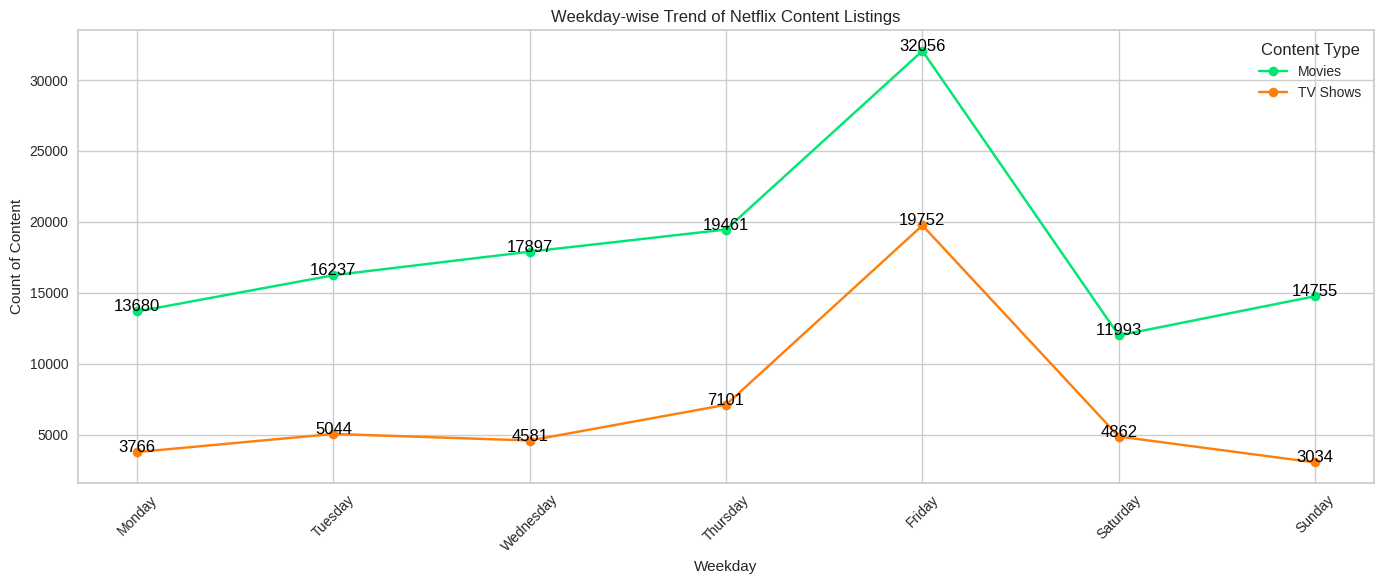

In [ ]:
# Chart - 9 visualization code

# Step 1: Group the DataFrame by 'Weekday' and 'type' and count the content
weekday_counts = df_copy.groupby(['Weekday', 'type']).size().unstack(fill_value=0)

# Step 2: Sort the weekdays in the correct order
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(ordered_weekdays)

# Step 3: Plot the line chart
plt.figure(figsize=(14, 6))
plt.plot(weekday_counts.index, weekday_counts['Movie'], marker='o', color='#00e673', label='Movies')
plt.plot(weekday_counts.index, weekday_counts['TV Show'], marker='o', color='#ff7f0e', label='TV Shows')

# Step 4: Add data labels
for i, value in enumerate(weekday_counts['Movie']):
    plt.text(i, value, str(value), color='black', ha='center')
for i, value in enumerate(weekday_counts['TV Show']):
    plt.text(i, value, str(value), color='black', ha='center')

# Step 5: Customize the chart
plt.title('Weekday-wise Trend of Netflix Content Listings')
plt.xlabel('Weekday')
plt.ylabel('Count of Content')
plt.legend(title='Content Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Step 6: Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** The line chart enables us to understand the Netflix week-wise content listing trend individually for Movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** Movies are listed more frequently than TV Shows on Netflix, with the number of movies being approximately 2.5 to 3 times greater than that of TV Shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** The gained insights indicate that movies are listed more frequently than TV Shows on Netflix, with movies outnumbering TV Shows by approximately 2.5 to 3 times. This insight can help create a positive business impact by highlighting the strong preference for movies among Netflix's content offerings. By understanding this trend, Netflix can strategically invest in acquiring or producing more movies to cater to this demand, thereby enhancing user satisfaction and potentially increasing subscriber retention.

However, the insight also suggests that TV Shows are comparatively underrepresented. If this gap indicates an unmet demand for TV Show content, it could lead to negative growth if subscribers who prefer TV Shows feel underserved. To avoid this, Netflix might need to balance its content strategy by boosting TV Show offerings, ensuring it caters to all audience preferences effectively.

#### **Chart - 10 : Netflix Movies Distribution by the Duration.**

In [ ]:
# Creating a new DataFrame by filtering the existing one
df_movies = df[df['type'] == 'Movie']

# let's check
df_movies["type"].value_counts()

type
Movie    126079
Name: count, dtype: int64

In [ ]:
df_movies['duration'].dtype

dtype('int64')

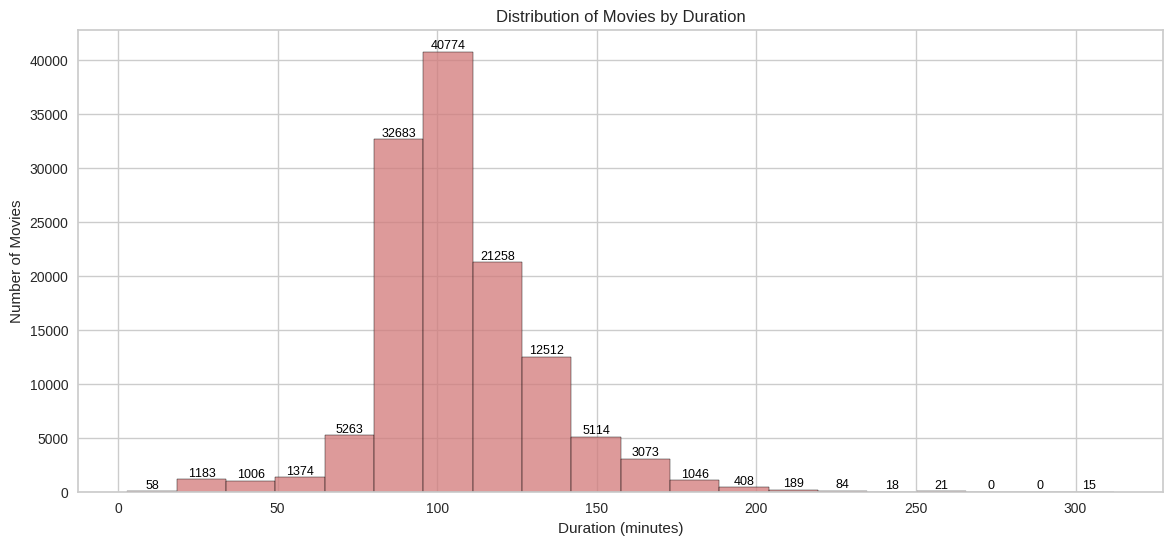

In [ ]:
# Chart - 10 visualization code



# Set the plot size
plt.figure(figsize=(14, 6))

# Plot the histogram
sns.histplot(data=df_movies, x='duration', color='#d27979', kde=False, bins=20)

# Adding data labels to each bin
bin_edges = plt.gca().patches
for patch in bin_edges:
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=9, color='black')

# Adding labels and title
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Duration')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Ans: A histogram is the best choice to visualize the segregation of movies by duration or runtime.




##### 2. What is/are the insight(s) found from the chart?

**Ans:** Around 85% of movies have the runtime or the duration of 90 min to 150 min.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans :** The insight that around 85% of movies have a runtime of 90 to 150 minutes can contribute to a positive business impact by aligning Netflix's content strategy with viewer preferences. Knowing that most movies fall within this duration range, Netflix can prioritize acquiring or producing films that match this runtime, catering to the typical viewing habits of their audience. This could enhance user engagement, as viewers might be more likely to watch content that fits within their expected viewing time.

On the other hand, if Netflix focuses too heavily on this specific duration range, it could lead to a negative growth impact by neglecting other audience segments who prefer shorter or longer films. To avoid this, Netflix should consider offering a variety of movie lengths to cater to different viewing preferences, ensuring they don't miss out on potential subscribers who seek content outside the 90 to 150-minute range.

#### **Chart - 11 : TV Shows Distribution by Number of Seasons.**

In [ ]:
# Creating a new DataFrame by filtering the existing one
df_TVshow = df[df['type'] == 'TV Show']

# let's check
df_TVshow["type"].value_counts()

type
TV Show    49728
Name: count, dtype: int64

In [ ]:
df_TVshow['duration'].dtype

dtype('int64')

In [ ]:
# Grouping by country and counting the number of movies per country
agg_df = df_TVshow.groupby('duration')['title'].count().reset_index()

# Renaming for clarity
agg_df.rename(columns={'title': 'counts'}, inplace=True)
agg_df.rename(columns={'duration': 'Seasons'}, inplace=True)

agg_df

Seasons  counts
0         1   30974
1         2    8198
2         3    4690
3         4    1901
4         5    1650
5         6     543
6         7     678
7         8     294
8         9     283
9        10     160
10       11      26
11       12     111
12       13      94
13       15      96
14       16      30

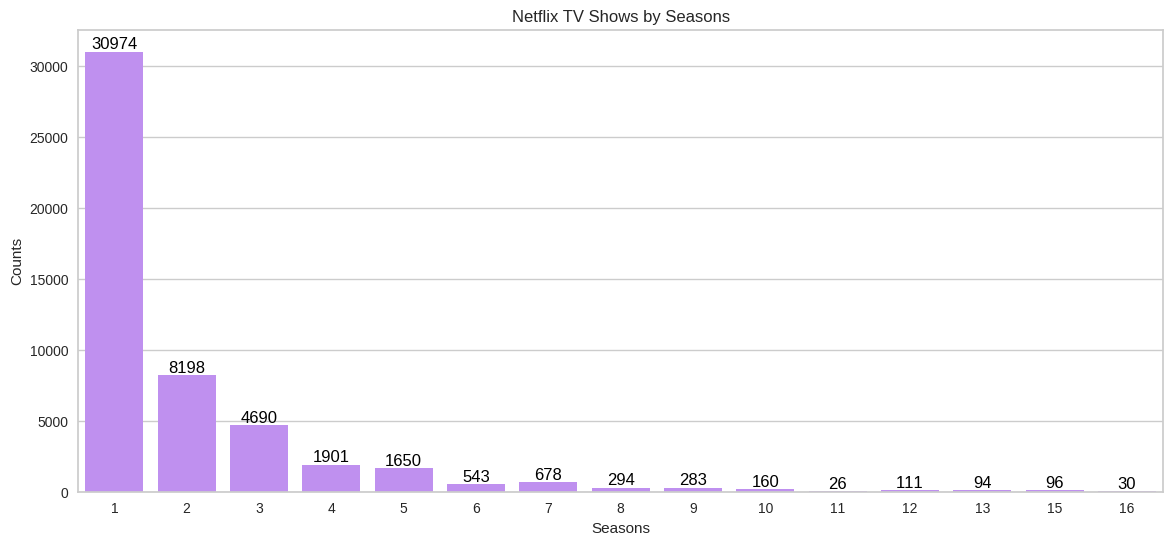

In [ ]:
# Chart - 11 visualization code



# Set the plot size
plt.figure(figsize=(14, 6))

# Create a bar chart
sns.barplot(x='Seasons', y='counts', data=agg_df, color='#bf80ff')

# Adding data labels to each bar
for index, value in enumerate(agg_df['counts']):
    plt.text(index, value, f'{int(value)}', ha='center', va='bottom', color='black')

# Adding labels and title
plt.xlabel('Seasons')
plt.ylabel('Counts')
plt.title('Netflix TV Shows by Seasons')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

**Ans:** I chose the bar chart because it is well-suited for visualizing categorical data and comparing the counts across different categories—in this case, TV shows across different No. of Seasons.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The highest number of TV shows have only the first season, and nearly 80% of Netflix TV shows are discontinued after the third season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Ans:** Yes, the gained insights can help create a positive business impact by informing strategic decisions about content production and retention. Knowing that the highest number of TV shows have only the first season, and that nearly 80% of shows are discontinued after the third season, suggests that early-stage content performance is crucial for long-term success. This insight can guide Netflix to invest more in content that shows strong potential in its initial seasons, possibly reallocating resources towards promoting or improving early-season engagement.

However, there is also a potential for negative growth if these trends are not addressed. The high discontinuation rate after the third season could indicate viewer fatigue or declining interest, which could harm subscriber retention. If viewers become aware that many shows they start watching are likely to be discontinued, it may reduce their trust in the platform’s content, leading to lower customer satisfaction and, eventually, subscriber churn. Therefore, addressing the reasons behind this trend is critical for maintaining positive growth.

#### **Chart - 12 : Top 10 Directors with highest Netflix Content.**

In [ ]:
df_dummy = df[df['Directors'] != "unknown"].copy()


In [ ]:
# Group by 'Directors' and count the number of content items for each director
agg_df = df_dummy.groupby('Directors').size().reset_index(name='counts of Content')

# Sort the dataframe by 'counts of Content' in descending order and get the top 10 directors
agg_df = agg_df.sort_values(by='counts of Content', ascending=False).head(10)

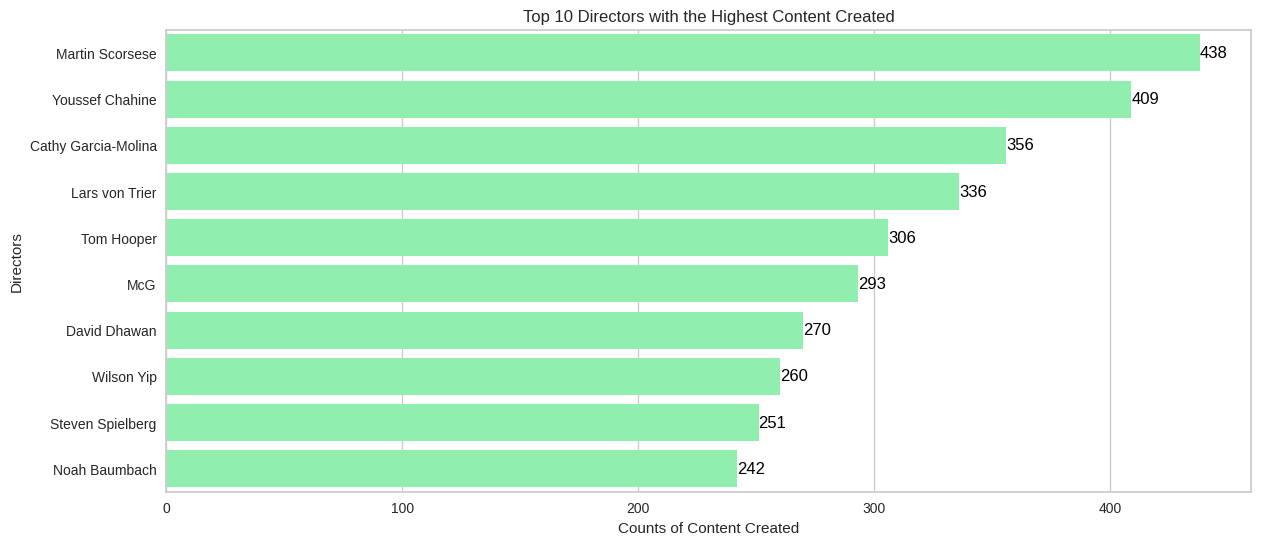

In [ ]:
# Chart - 12 visualization code


# Set the plot size
plt.figure(figsize=(14, 6))

# Create a horizontal bar chart
sns.barplot(x='counts of Content', y='Directors', data=agg_df, color='#80ffaa')

# Adding data labels to each bar
for index, value in enumerate(agg_df['counts of Content']):
    plt.text(value, index, f'{int(value)}', ha='left', va='center', color='black')

# Adding labels and title
plt.xlabel('Counts of Content Created')
plt.ylabel('Directors')
plt.title('Top 10 Directors with the Highest Content Created')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

**Ans :** The bar chart visualizes and enables to list of the Top 10 Directors with the highest content direction count by comparing their count.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** The bar chart visualizes the Top 10 Directors with the highest content direction count, allowing for easy comparison of their contributions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 13 : Top 10 Actors with the Highest Netflix Shows or Movies Worked in**

In [ ]:
# Create a new DataFrame by excluding records where 'Actors' = "unknown"
df_dummy = df[df['Actors'] != "unknown"].copy()

In [ ]:
# Group by 'Actors' and count the number of content items for each actor
agg_df = df_dummy.groupby('Actors').size().reset_index(name='counts of Content')

# Sort the dataframe by 'counts of Content' in descending order and get the top 10 actors
agg_df = agg_df.sort_values(by='counts of Content', ascending=False).head(10)

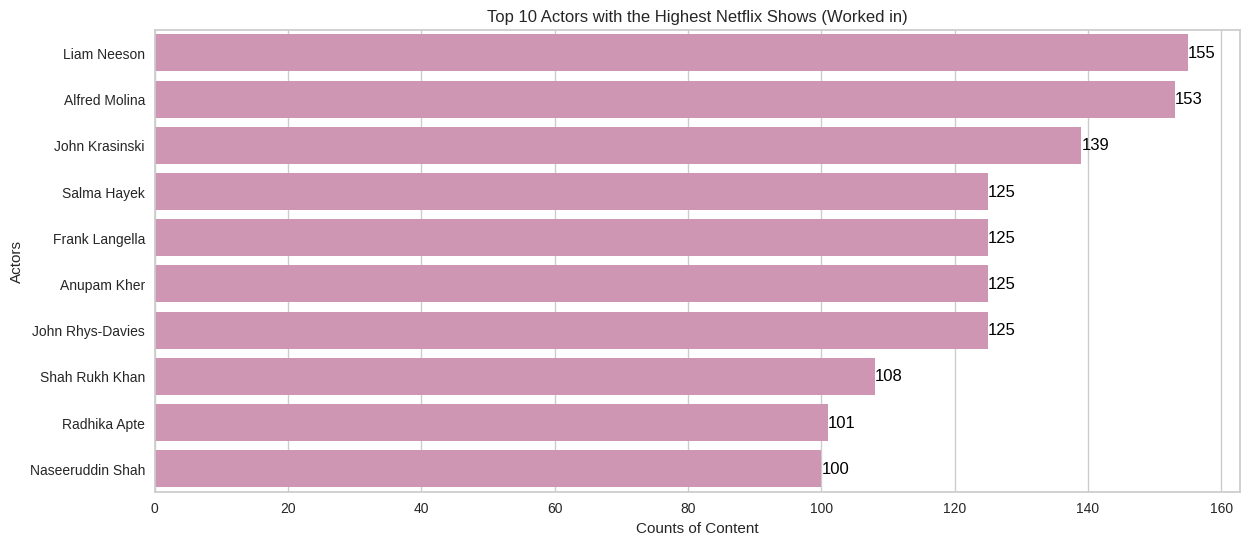

In [ ]:
# Chart - 13 visualization code




# Set the plot size
plt.figure(figsize=(14, 6))

# Create a horizontal bar chart
sns.barplot(x='counts of Content', y='Actors', data=agg_df, color='#d98cb3')

# Adding data labels to each bar
for index, value in enumerate(agg_df['counts of Content']):
    plt.text(value, index, f'{int(value)}', ha='left', va='center', color='black')

# Adding labels and title
plt.xlabel('Counts of Content')
plt.ylabel('Actors')
plt.title('Top 10 Actors with the Highest Netflix Shows (Worked in)')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### **Chart - 14 - Correlation Heatmap : % Distribution of Content by Audience type for various countries.**

In [ ]:
df = df.loc[:, ~df.columns.duplicated()]

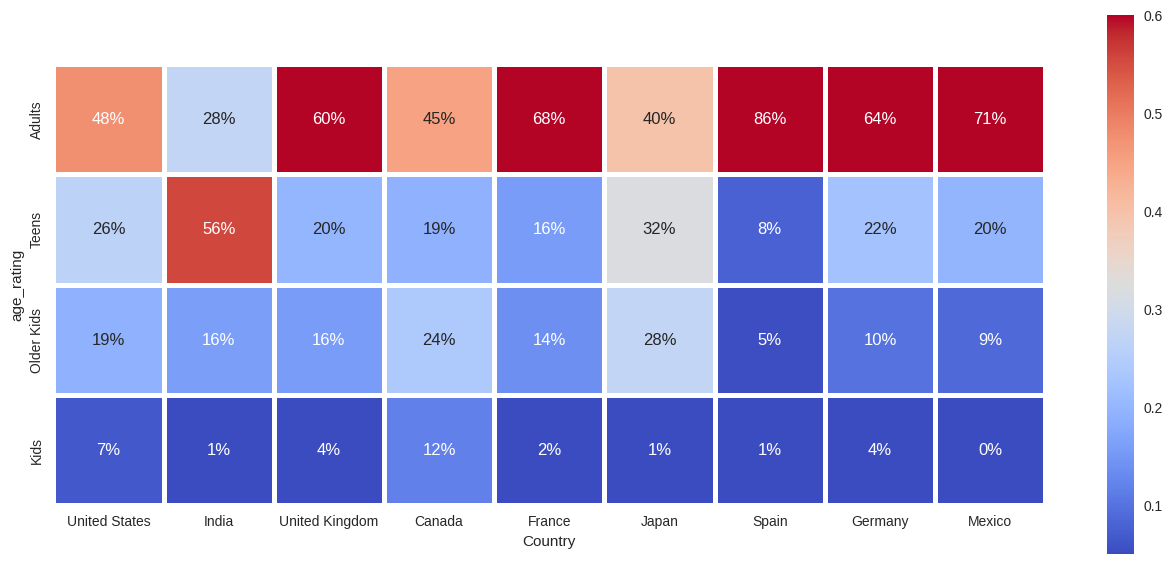

In [ ]:
# Correlation Heatmap visualization code

df['count'] = 1
data = df.groupby('Country')['count'].sum().sort_values(ascending=False).head(10).index
df_heatmap = df[df['Country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['Country'], df_heatmap['age_rating'], normalize="index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(16, 7))

# Defining order of representation
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan', 'Spain', 'Germany', 'Mexico']
rating_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

# Calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order, country_order], cmap="coolwarm", square=True, linewidth=2.5, cbar=True, annot=True, fmt='1.0%',
            vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 12})
plt.show()

##### 1. Why did you pick the specific chart?

**Answ:** The heatmap effectively visualizes the percentage distribution of content creation across different age groups and countries.

##### 2. What is/are the insight(s) found from the chart?

**Ans:** We analyzed the percentage distribution of content creation across different countries, with the following insights:

* Except for India, countries such as the US, UK, Canada, France, Japan, Spain, Germany, and Mexico prefer to create adult content, accounting for around 50% to 70% of their total content.

* Similarly, these countries, excluding India, focus on creating content for teens, which makes up about 20% to 30% of their offerings.

* For content aimed at kids and older kids, most countries (except Japan and Canada) produce less than 20% of their total content.

#### **Chart - 15 - Pair Plot**

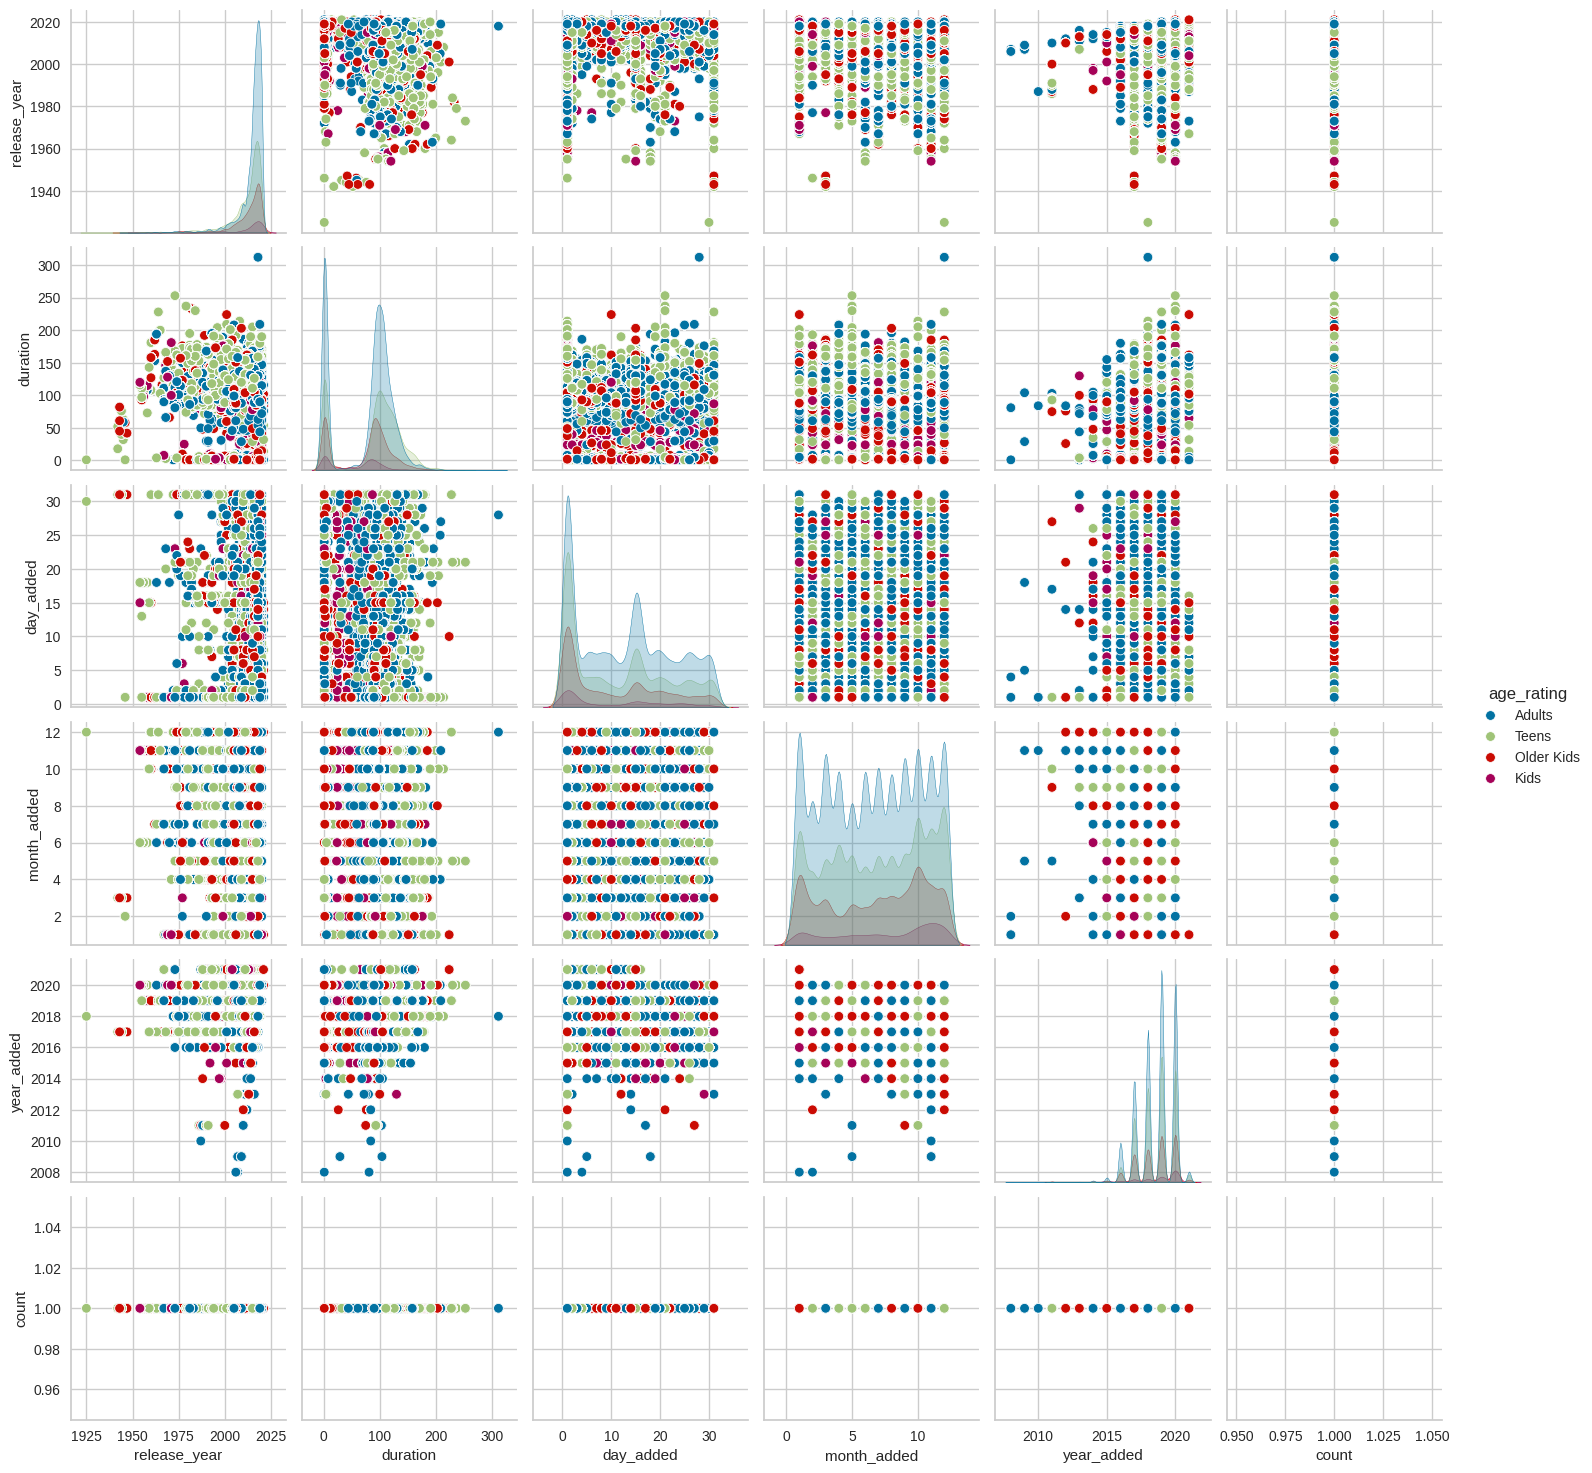

In [ ]:
# Pair Plot visualization codee

        # Note: It will take more time to be executed, around 5 Min  .... Be Patient :)

sns.pairplot(df,hue="age_rating")

##### 1. Why did you pick the specific chart?

**Ans:** A pair plot helps identify the most effective features for explaining the relationship between two variables or for forming well-separated clusters.


##### 2. What is/are the insight(s) found from the chart?

**Ans:**
It’s clear that the distribution of movies has a greater impact compared to TV shows in the given dataset. Movies are downloaded more frequently than TV shows.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

## *Hypothetical Statement 1:*

*  **Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.
*   **Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

## *Hypothetical Statement 2*:

*   **Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.
*   **Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

## *Hypothetical Statement 3:*

*   **Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.
*   **Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.


### **Hypothetical Statement - 1**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   **Null Hypothesis** - There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.
*   **Alternative Hypothesis** - There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.





#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value


# the function is used to perform z test of proportion.
from statsmodels.stats.proportion import proportions_ztest

# Subset the data to only include drama and comedy movies
subset = df[df['Genre'].str.contains('Dramas') | df['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  64.8000705213286
p-value:  0.0
Reject the null hypothesis.


#### In conclusion, there is a significant difference in the proportion ratings of the Drama movies and the Comedy movies on Netflix.

##### **Q. Which statistical test have you done to obtain P-Value?**

**Ans:** The statistical test we have used to obtain the P-value is the z-test for proportions.

##### **Q. Why did you choose the specific statistical test?**

**Ans:**
The z-test for proportions was selected because our analysis involves comparing the proportions of two categorical variables—specifically, drama movies and comedy movies—in a sample. The central goal is to test whether the observed difference in these proportions is statistically significant.

Given that our null hypothesis assumes no difference between the proportions, and the alternative hypothesis suggests there is a difference, the z-test for proportions is the most appropriate method. This test allows us to quantify the likelihood that the observed difference could have occurred by chance if the null hypothesis is true, providing a robust way to assess statistical significance in this context.

### **Hypothetical Statement - 2**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

**Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value



# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2020)]
tv_2021 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')



t-value:  -6.002151232542292
p-value:  7.23381843379902e-09
Reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.


##### **Q. Which statistical test have you done to obtain P-Value?**

**Ans:** The statistical test used to obtain the P-value is a two-sample t-test.

##### **Q. Why did you choose the specific statistical test?**

**Ans:** The two-sample t-test was chosen for this analysis because we are comparing the means of two distinct samples—TV shows added in 2020 versus TV shows added in 2021—to determine if there is a statistically significant difference between them. This test is particularly suitable because we do not expect the variances of these two samples to be equal; it's reasonable to assume that the duration of TV shows added in 2020 might vary differently from those added in 2021. The two-sample t-test accounts for these differences in variance, making it the appropriate choice for accurately assessing whether the means of the two groups are significantly different.

### **Hypothetical Statement - 3**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Ans:**

*   **Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

*   **Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# This function is used to perform z test of proportion.
from statsmodels.stats.proportion import proportions_ztest

# Calculate the proportion of drama and comedy movies
tv_proportion = np.sum(df_tvshows['Country'].str.contains('United States')) / len(df_tvshows)
movie_proportion = np.sum(df_movies['Country'].str.contains('United States')) / len(df_movies)

# Set up the parameters for the z-test
count = [int(tv_proportion * len(df_tvshows)), int(movie_proportion * len(df_movies))]
nobs = [len(df_tvshows), len(df_movies)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")

z-statistic:  -4.838078469799881
p-value:  1.3110038583414833e-06
Reject the null hypothesis.


##### **Q. Which statistical test have you done to obtain P-Value?**

**Ans:** The statistical test used to obtain P-Value is a two-sample proportion test.

##### **Q. Why did you choose the specific statistical test?**

**Ans:** We selected this specific statistical test because it is well-suited for comparing two proportions. It allows us to determine whether the observed difference between the two proportions is statistically significant or merely due to random chance. This test provides a reliable method to assess whether the difference in proportions reflects a true effect or is likely to have occurred by accident.

## ***6. Feature Engineering & Data Pre-processing***

### **6.1 Handling Missing Values**

In [ ]:
# Handling Missing Values & Missing Value Imputation

df.isna().sum()

# Since we have already dealed with null value. So it is not needed now.
# Except, the newly generated colums- 'day_added', 'month_added', 'year_added'
# However, there will not be any downfall due to them.

title              0
Actors             0
Directors          0
Genre              0
Country            0
type               0
date_added      1588
release_year       0
age_rating         0
duration           0
description        0
day_added       1588
Weekday         1588
month_added     1588
year_added      1588
count              0
dtype: int64

* Let's move ahead, as we have already dealed with null/missing values from our dataset.

### **6.2 Handling Outliers**

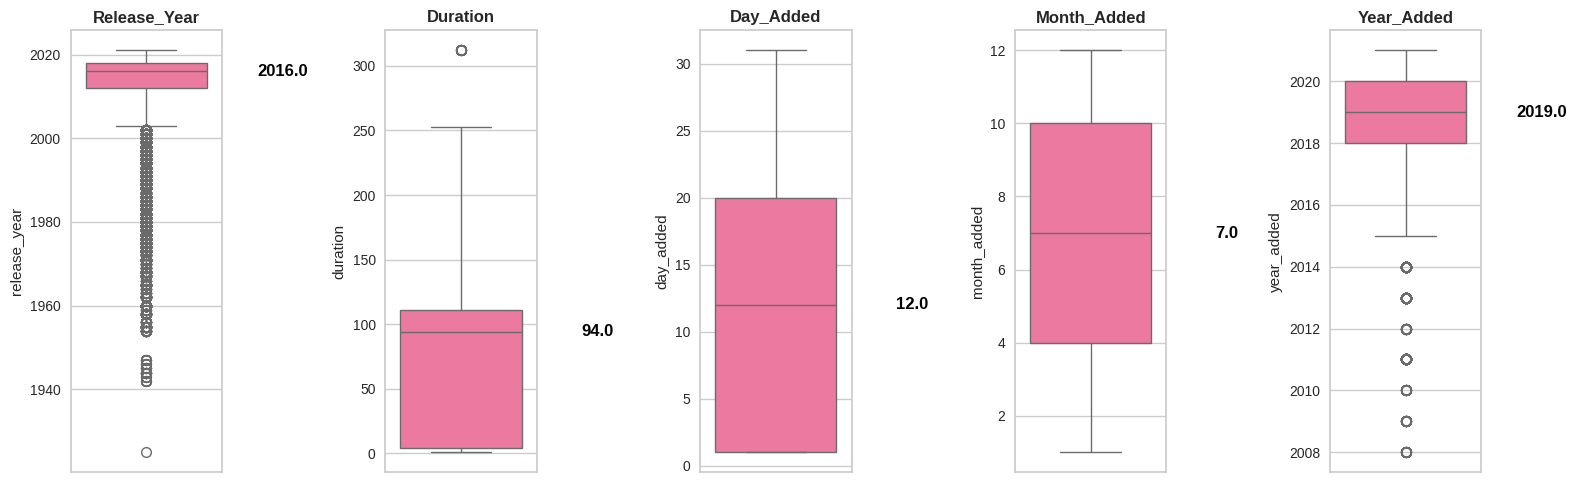

In [ ]:
# Storing the continuous value features in a separate list
continous_value_feature = ["release_year", "duration", "day_added", "month_added", "year_added"]

# Checking outliers with the help of box plot for continuous features
plt.figure(figsize=(16, 5))
for n, column in enumerate(continous_value_feature):
    plt.subplot(1, 5, n + 1)
    boxplot = sns.boxplot(y=df[column], color='#ff6699')

    # Calculate the median for the column
    median = df[column].median()

    # Annotate the median value on the plot
    plt.text(0.9, median, f'{median:.1f}', color='black', ha='center', va='center', weight='bold')

    plt.title(f'{column.title()}', weight='bold')
    plt.tight_layout()

plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Ans:** Although we have some of the anomalies in continous feature but we will not treat by considering outliers as some of the Movies/TV Shows has released or added early on Netflix.

### **6.3 Textual Data Preprocessing**
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# Here we are taking the copied dataframe as the data having more number of observations resulted in ram exhaustion.
df.shape, df_new.shape

((175807, 16), (7770, 12))

In [ ]:
# Binning of rating in new dataframe
df_new['rating'].replace(rating_map, inplace = True)

# Checking sample after binning
df_new.sample(2)

show_id   type                                              title  \
487     s488  Movie  An American Tail: The Mystery of the Night Mon...   
3323   s3324  Movie                       Katt Williams: Kattpacalypse   

          director                                               cast  \
487   Larry Latham  Thomas Dekker, Lacey Chabert, Jane Singer, Neh...   
3323  Marcus Raboy                                      Katt Williams   

            country     date_added  release_year  rating duration  \
487   United States  April 1, 2018          1999    Kids   75 min   
3323  United States   July 3, 2018          2012  Adults   61 min   

                     listed_in  \
487   Children & Family Movies   
3323           Stand-Up Comedy   

                                            description  
487   When a monster goes on a mouse-napping spree i...  
3323  Urban comic Katt Williams ushers in Kattpacaly...

#### a). Expand Contraction

In [ ]:
# Expand Contraction
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  rating   duration  \
0    August 14, 2020          2020  Adults  4 Seasons   
1  December 23, 2016          2016  Adults     93 min   
2  December 20, 2018          2011  Adults     78 min   
3  November 16, 2017          2009   Teens     80 min   
4    January 1, 2020          2008   Teens    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  
0  João Miguel, Bianca Comparato, Michel Gomes, R...  
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...

#### b). Lower Casing

In [ ]:
# Lower Casing
df_new['content_detail']= df_new['content_detail'].str.lower()

# Checking the manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia, prabhu deva, sonu sood, sapthagiri, murli sharma, r.v. udhaykumar, joy mathew, hema a. l. vijay comedies, international movies, sci-fi & fantasy movie teens india due to family pressure, a corporate man reluctantly marries a woman from the village, but in their new home, she abruptly assumes a different persona.'

#### c). Removing Punctuations

In [ ]:
# Remove Punctuations

# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [ ]:
# Removing Punctuations from the content_detail
df_new['content_detail']= df_new['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teens india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### d). Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teens india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### e). Removing Stopwords & Removing White spaces

In [ ]:
# Downloading stopwords
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies international movies scifi fantasy movie teens india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

In [ ]:
df_new['content_detail'][0]

'jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi unknown international tv shows tv dramas tv scifi fantasy tv show adults brazil future elite inhabit island paradise far crowded slums get one chance join saved squalor'

#### f). Tokenization

In [ ]:
# Tokenization
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df_new['content_detail']= df_new['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hema',
 'l',
 'vijay',
 'comedies',
 'international',
 'movies',
 'scifi',
 'fantasy',
 'movie',
 'teens',
 'india',
 'due',
 'family',
 'pressure',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'woman',
 'village',
 'new',
 'home',
 'abruptly',
 'assumes',
 'different',
 'persona']

#### g). Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [ ]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [ ]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df_new['content_detail']= df_new['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedy international movie scifi fantasy movie teen india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

##### Which text normalization technique have you used and why?

**Ans:**  We have used Lemmatization instead of Stemming for our project because:

*   **Lemmatization produces a more accurate base word:**Unlike Stemming, which simply removes the suffix from a word, Lemmatization looks at the meaning of the word and its context to produce a more accurate base form.
*   **Lemmatization can handle different inflections:**Lemmatization can handle various inflections of a word, including plural forms, verb tenses, and comparative forms, making it useful for natural language processing.

*   **Lemmatization produces real words:**: Lemmatization always produces a real word that can be found in a dictionary, making it easier to interpret the results of text analysis.
*   **Lemmatization improves text understanding:**By reducing words to their base form, Lemmatization makes it easier to understand the context and meaning of a sentence.

*   **Lemmatization supports multiple languages:** While Stemming may only work well for English, Lemmatization is effective for many different languages, making it a more versatile text processing technique.


#### h). Part of speech tagging

In [ ]:
# tokenize the text into words before POS Taging
df_new['pos_tags'] = df_new['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df_new.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  rating   duration  \
0    August 14, 2020          2020  Adults  4 Seasons   
1  December 23, 2016          2016  Adults     93 min   
2  December 20, 2018          2011  Adults     78 min   
3  November 16, 2017          2009   Teens     80 min   
4    January 1, 2020          2008   Teens    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  \
0  jo miguel bianca comparato michel gomes rodolf...   
1  demi n bichir h ctor bonilla oscar serrano aza...   
2  tedd chan stella chung henley hii lawrence koh...   
3  elijah wood john c reilly jennifer connelly ch...   
4  jim sturgess kevin spacey kate bosworth aaron ...   

                                            pos_tags  
0  [(jo, NN), (miguel, NN), (bianca, NN), (compar...  
1  [(demi, NN), (n, CC), (bichir, NN), (h, NN), (...  
2  [(tedd, NN), (chan, NN), (stella, NN), (chung,...  
3  [(elijah, RB), (wood, NN), (john, NN), (c, VBP...  
4  [(jim, NN), (sturgess, NN), (kevin, NN), (spac...

#### i). Text Vectorization

In [ ]:
# Vectorizing Text

# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosion

In [ ]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(df_new['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(7770, 30000)


##### Which text vectorization technique have you used and why?

**Ans:** We opted for TF-IDF vectorization instead of Bag of Words because TF-IDF considers the significance of each word in a document. Additionally, TF-IDF assigns higher weights to rare words that are unique to a specific document, thereby emphasizing their importance in the representation.

### **6.4 Dimensionality Reduction**

##### Do you think that dimensionality reduction is needed? Explain Why?

**Ans:**  Yes, dimensionality reduction is necessary in this case. When processing textual data, text vectorization can create up to 30,000 attributes, resulting in a vast number of columns. Handling such a large and sparse matrix can be challenging for local machines due to computational limitations. Therefore, we will use Principal Component Analysis (PCA) to reduce the dimensionality of this dataset. PCA helps to simplify the dataset by retaining the most important features while significantly reducing the number of columns, making the data more manageable and improving the efficiency of further analysis.

In [ ]:
# Dimensionality Reduction

        # Note: It will take more time to be executed, around 16 Min  .... Be Patient :)

# Importing PCA from sklearn
from sklearn.decomposition import PCA

# Defining PCA object with desired number of components
pca = PCA()

# Fitting the PCA model
pca.fit(x.toarray())

# percent of variance captured by each component
variance = pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [1.44176727e-02 4.16308750e-03 3.26403796e-03 ... 3.54550321e-36
 1.49089330e-36 1.09128962e-37]


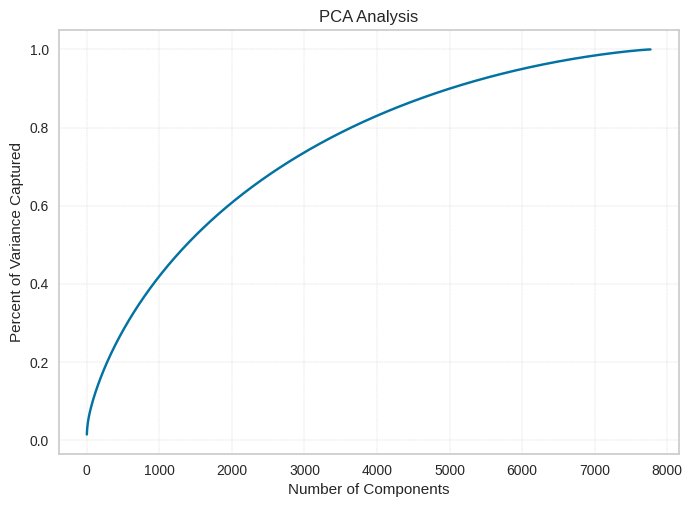

In [ ]:



# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

* It is clear from the above plot that 7770 principal components can capture 100% of the variance. For our case, we will consider only those numbers of PCs that can capture 95% of the variance.

In [ ]:
## Now we are passing the argument so that we can capture 95% of variance.

        # Note: It will take more time to be executed, around 16 Min  .... Be Patient :)


# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

(7770, 5997)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

**Ans:**  We used Principal Component Analysis (PCA) for dimensionality reduction. PCA is a widely recognized technique that effectively reduces the dimensionality of high-dimensional datasets while preserving most of the essential information from the original data.

PCA is a popular choice due to its simplicity, computational efficiency, and broad availability in data analysis tools. Its strong theoretical foundation and extensive study in the field make PCA a reliable and well-understood method for dimensionality reduction, making it ideal for handling complex datasets.

## ***7. ML Model Implementation***

### ML Model - 1 :  **K-Means Clustering**

* K-means clustering is an unsupervised machine learning algorithm used to divide a dataset into K clusters, where data points within each cluster share similar characteristics. The primary objective of the algorithm is to minimize the total sum of squared distances between each data point and the centroid of its assigned cluster. This process is iterative: the algorithm first assigns each data point to the nearest centroid, then recalculates the centroids based on the current cluster assignments. The algorithm continues to iterate until the cluster assignments stabilize or a predefined maximum number of iterations is reached.

* To determine the optimal number of clusters, we'll use the ELBOW method by iterating over a range of clusters, from 1 to 16. This method helps identify the point where adding more clusters no longer significantly reduces the sum of squared distances, indicating an optimal balance between model complexity and clustering accuracy.

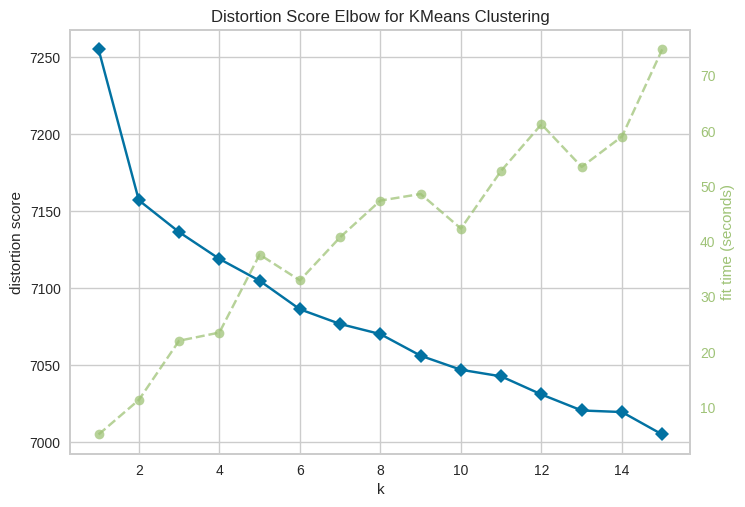

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# ML Model - 1 Implementation code

        # Note: It will take more time to be executed, around 16 Min  .... Be Patient :)


## Determining optimal value of K using KElbowVisualizer

# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,16),locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

It appears that the elbow seems to suggest 2 clusters as the optimal choice. However, to ensure accuracy, let’s plot another chart that iterates over various cluster numbers and calculates the Silhouette Score for each.

**What is the Silhouette Score?**

The Silhouette Score measures how well each data point is assigned to its cluster compared to other clusters. It evaluates the quality of clustering by indicating how similar a point is to its own cluster relative to other clusters.

The score ranges from -1 to 1:
- **1**: The data point is well-matched to its own cluster and poorly matched to neighboring clusters.
- **0**: The data point is on or very close to the boundary between two clusters.
- **-1**: The data point is poorly matched to its own cluster and well-matched to neighboring clusters.

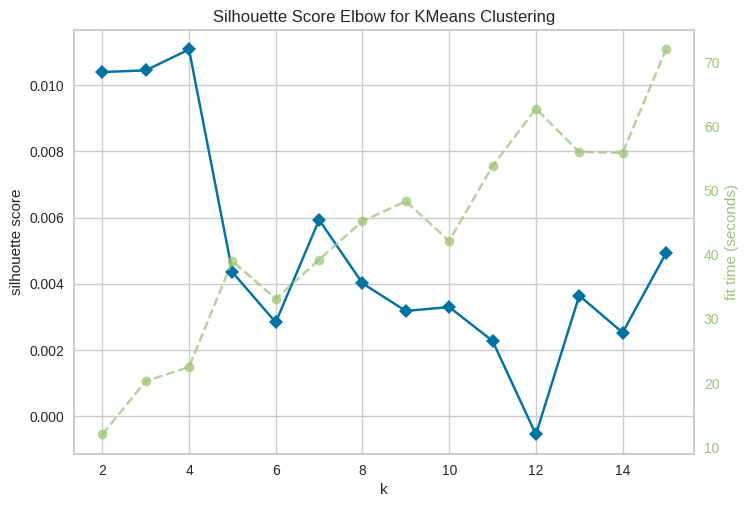

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
## Determining optimal value of K using KElbowVisualizer


        # Note: It will take more time to be executed, around 16 Min  .... Be Patient :)

# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

In [ ]:
## Computing Silhouette score for each k


        # Note: It will take more time to be executed, around 10 Min  .... Be Patient :)


# Importing needed libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Defining Range
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.010318
k=3, Silhouette score=0.010158
k=4, Silhouette score=0.010489
k=5, Silhouette score=0.004999
k=6, Silhouette score=0.004934


* Based on the above plots (Elbow plot and Silhouette plot), it's evident that the Silhouette score is comparatively better for 4 clusters. Therefore, we will proceed with 4 clusters for our K-means analysis.

* Now, let’s visualize how our data points are distributed after being assigned to their respective clusters.

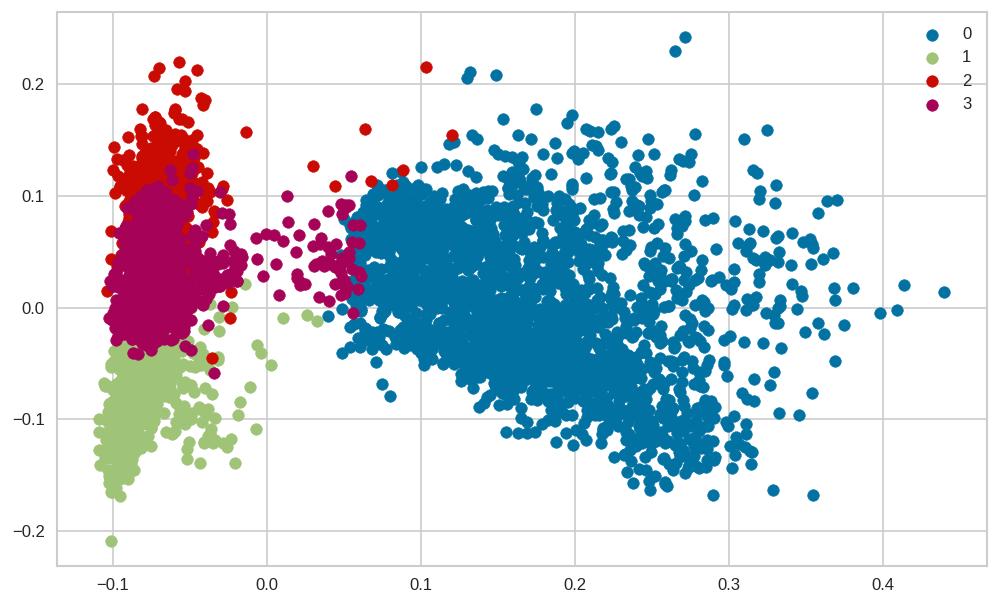

In [ ]:
# Training the K-means model on a dataset


        # Note: It will take more time to be executed, around 16 Min  .... Be Patient :)

kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

# Predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
# Getting unique labels
unique_labels = np.unique(label)

# Plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

* We have identified 4 distinct clusters, but the current plot is two-dimensional. To gain a clearer view of the cluster separation, let's plot the data in 3D using the mplot3d library and observe how the clusters appear in three-dimensional space.

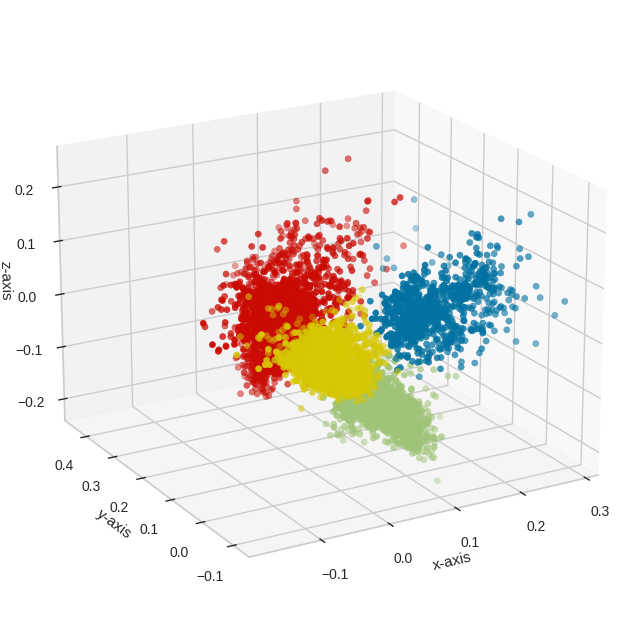

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

* Great! We can easily distinguish all 4 clusters visually. Now, let's assign each 'Content' to its respective cluster by adding an additional attribute to the final DataFrame.

In [ ]:
# Add cluster values to the dateframe.
df_new['kmeans_cluster'] = kmeans.labels_

In [ ]:
print("Model - 1 (KNN) code is perfect....!!")

Model - 1 (KNN) code is perfect....!!


#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

* Starting with defining a function that plot a wordcloud for each of the attribute in the given dataframe.

In [ ]:
# Visualizing evaluation Metric Score chart

def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df_new[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

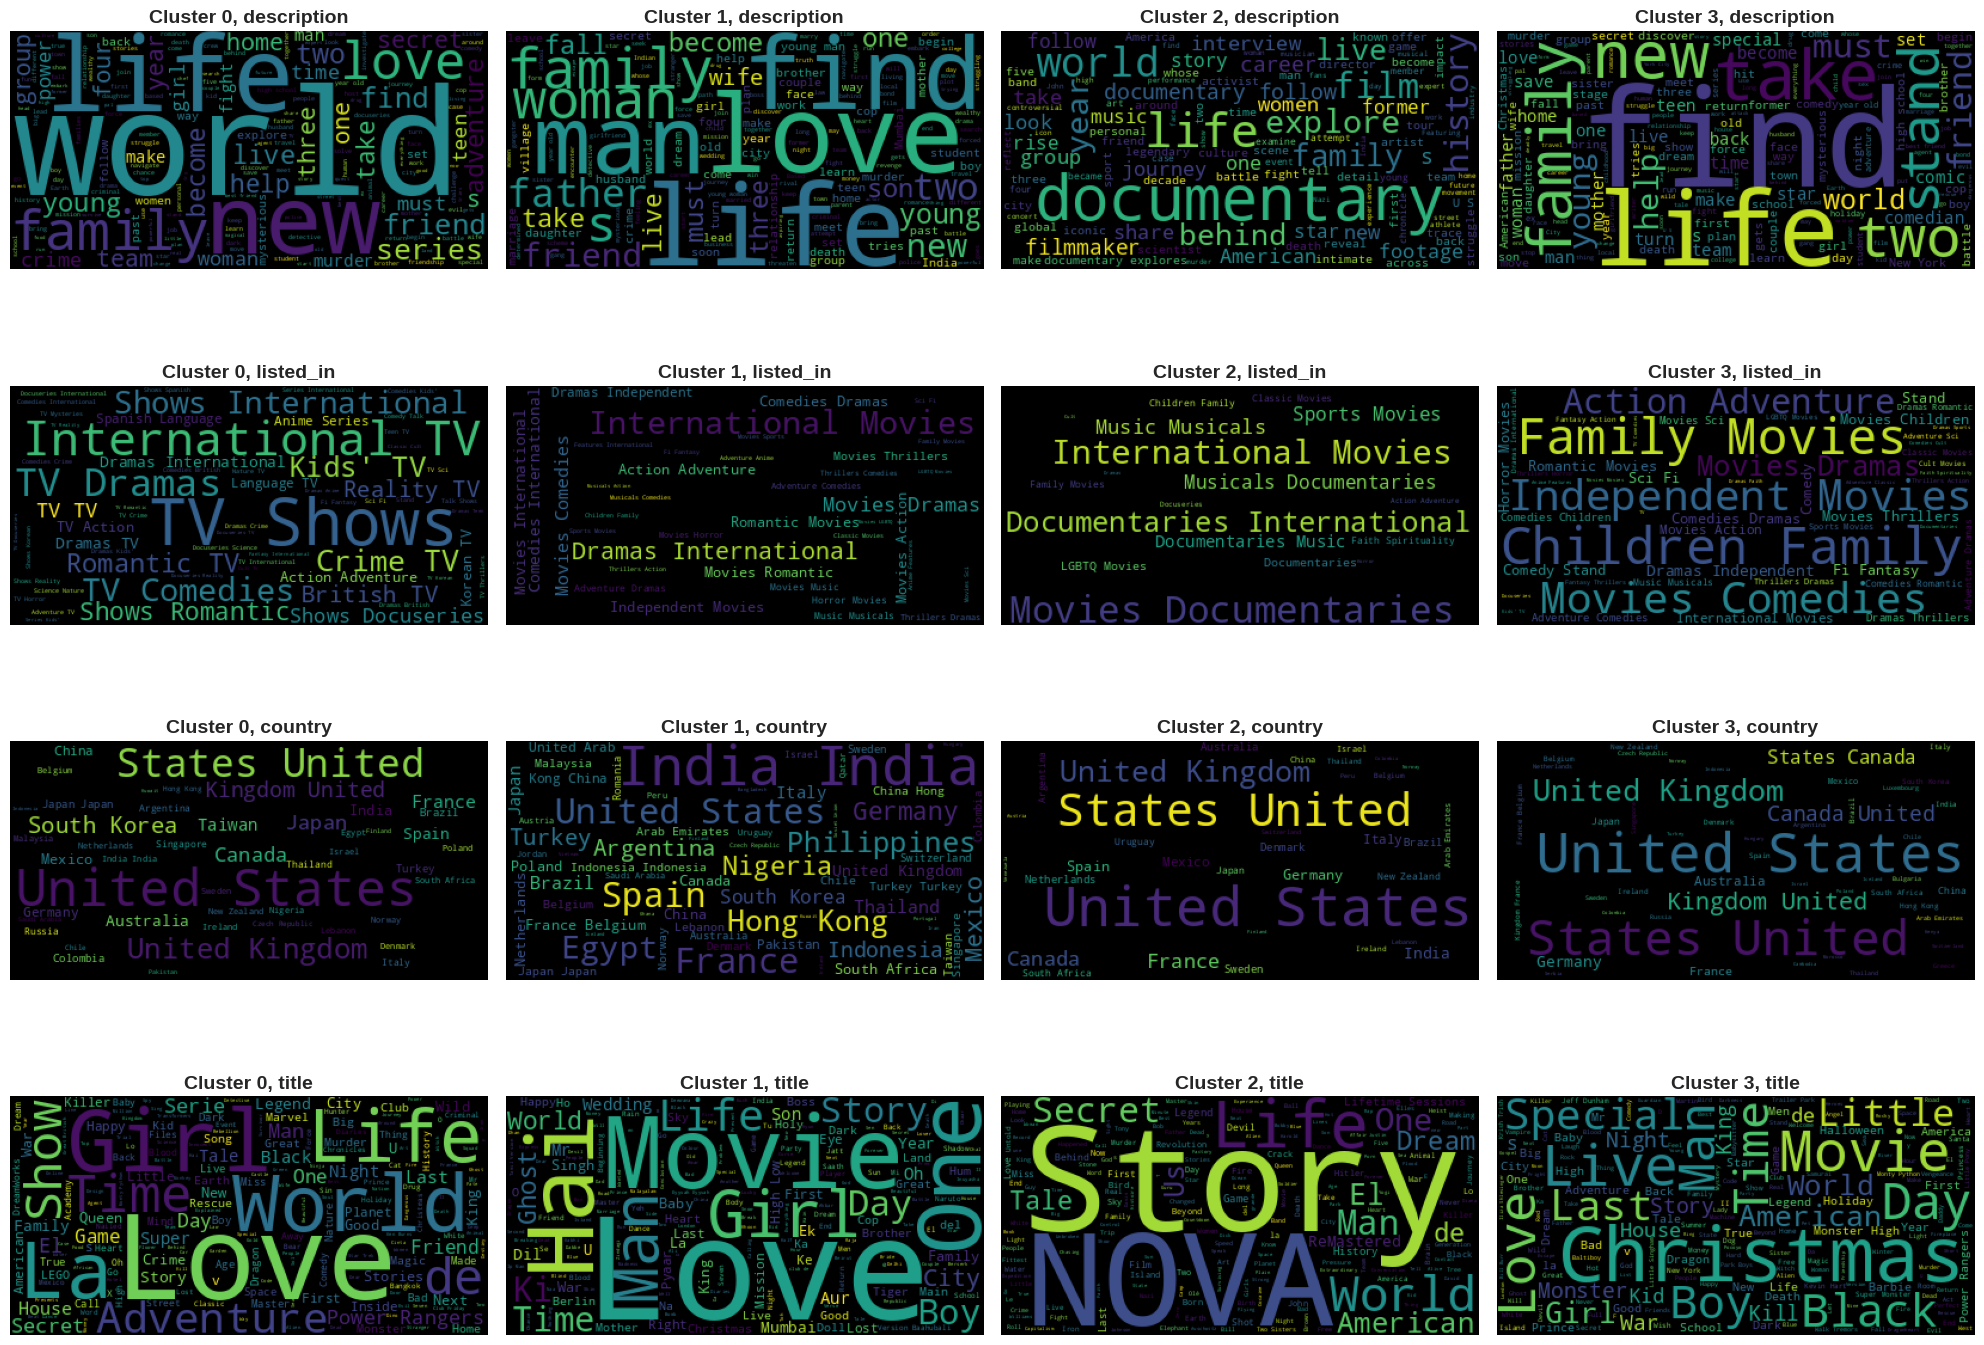

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 2 : **Hierarchial Clustering**



* Hierarchical clustering is an algorithm that groups similar data points into clusters by recursively merging or splitting clusters based on their similarity or distance. This method organizes the data into a tree-like structure, which allows for a more detailed exploration of the relationships between data points.

* To begin, let's plot a Dendrogram, which will help us visualize the hierarchical structure and determine the optimal number of clusters.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

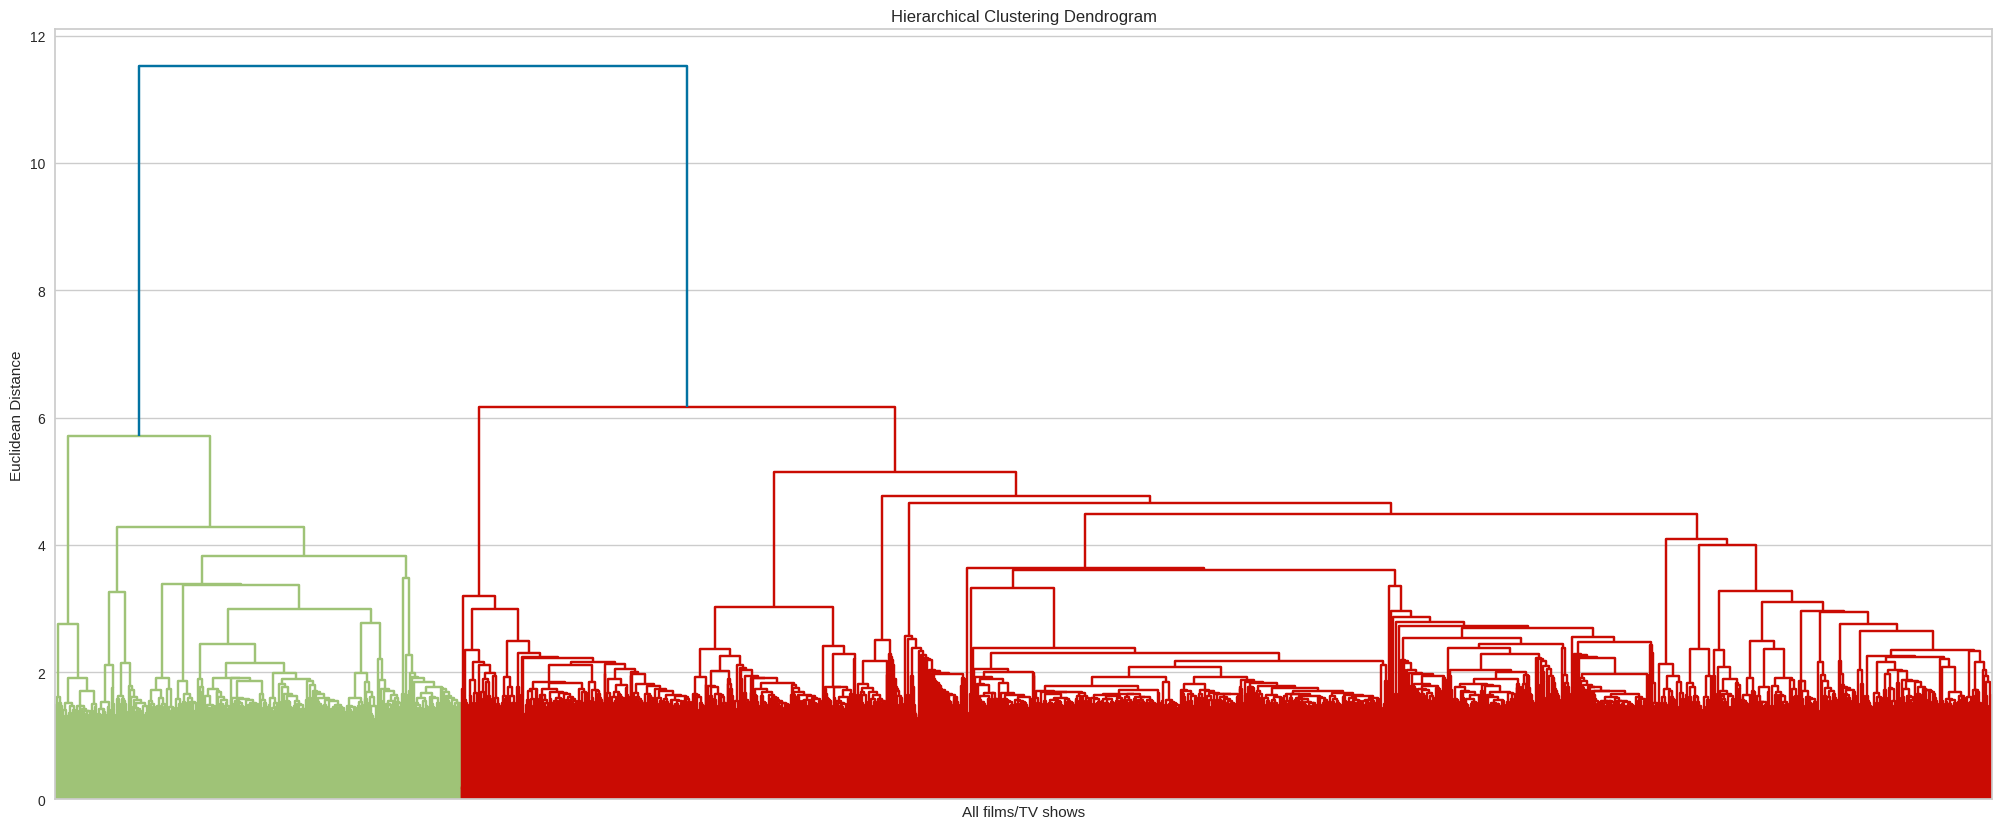

In [ ]:
# Visualizing evaluation Metric Score chart


        # Note: It will take more time to be executed, around 10 Min  .... Be Patient :)

#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

Cool, but what is a Dendrogram, and how do we determine the optimal number of clusters?

* A dendrogram is a tree-like diagram that illustrates the sequences of merges or splits in hierarchical clustering. The length of the vertical lines in the dendrogram represents the distance between clusters—the longer the line, the greater the distance between the clusters being connected.

* From the dendrogram above, we can infer that the optimal number of clusters is 2. However, before we finalize the cluster assignments, let's evaluate the silhouette scores using Agglomerative Clustering. This method follows a bottom-up approach, where individual data points are gradually aggregated into clusters, helping us confirm the best cluster configuration.

In [ ]:
## Computing Silhouette score for each k


        # Note: It will take more time to be executed, around 10 Min  .... Be Patient :)

# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.005053
k=3, Silhouette score=0.004961
k=4, Silhouette score=0.000415
k=5, Silhouette score=0.000551
k=6, Silhouette score=0.001197
k=7, Silhouette score=0.001397
k=8, Silhouette score=0.001845
k=9, Silhouette score=0.001032


* Based on the silhouette scores, it's evident that 2 clusters are the optimal choice, as they yield the highest Silhouette score. This aligns with the Dendrogram, which also indicates that the Euclidean distances are maximized for 2 clusters.
Now, let's plot the chart again to visualize the two distinct clusters that have been formed.

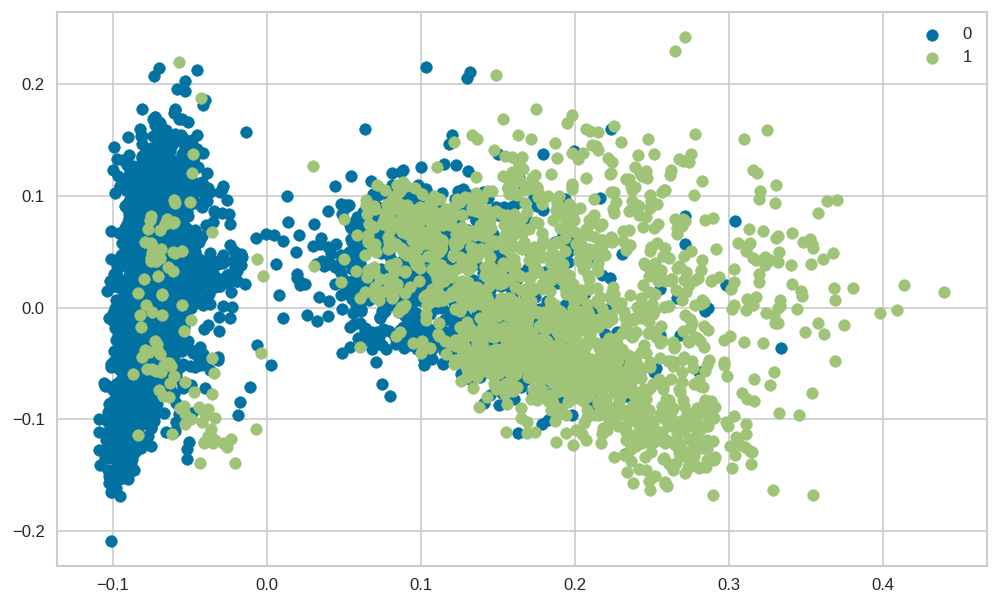

In [ ]:
# Training the K-means model on a dataset

        # Note: It will take more time to be executed, around 10 Min  .... Be Patient :)


Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

# Predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_transformed)
# Getting unique labels
unique_labels = np.unique(label)

# Plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

* Again plotting the 3 Dimensional plot to see the clusters clearly.

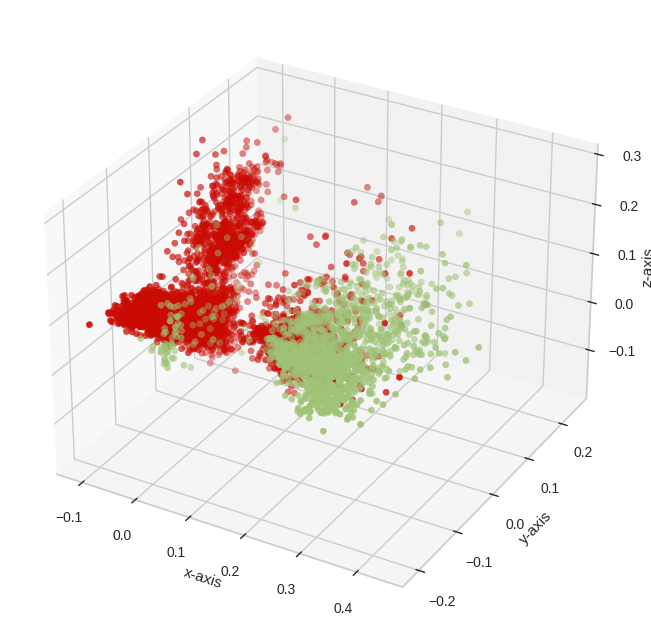

In [ ]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

* Great! We can easily distinguish the two clusters visually. Now, let's assign the 'Content' (Movies and TV Shows) to their respective clusters by adding an additional attribute to the final DataFrame.

In [ ]:
# Add cluster values to the dateframe.
df_new['agglomerative_cluster'] = Agmodel.labels_

#### **1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

* Let's define a function to generate a word cloud for different attributes based on the clusters formed by Agglomerative Clustering. This will help visualize the most frequent words within each cluster.

In [ ]:
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df_new[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

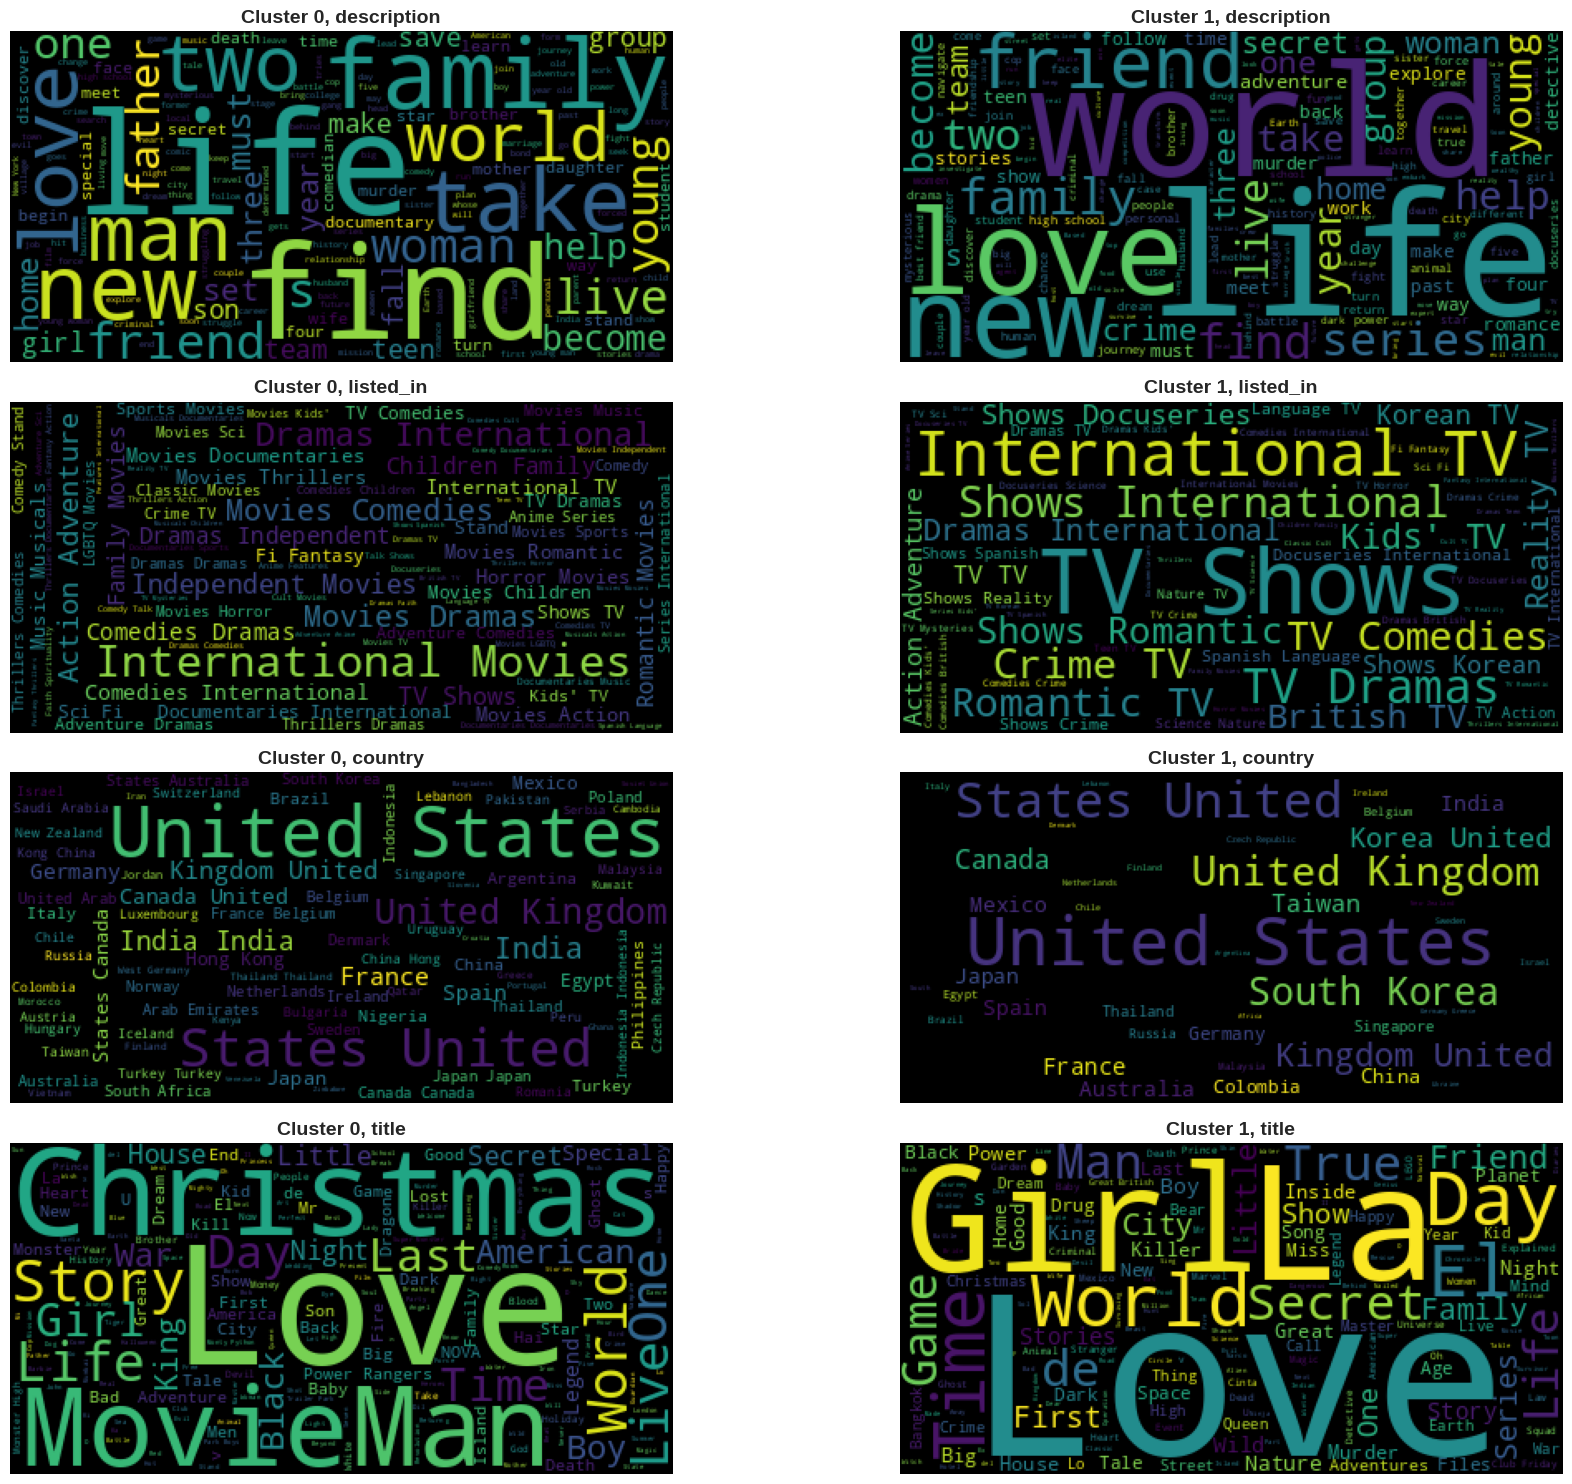

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 3 : **Building a Recommendaton System**




* We are using Cosine Similarity as it measures the similarity between two non-zero vectors in a multidimensional space. Specifically, it calculates the cosine of the angle between the vectors, with a range from -1 (indicating opposite directions) to 1 (indicating the same direction), and 0 signifying orthogonality (meaning the vectors are perpendicular to each other).

* In this project, Cosine Similarity is employed to assess the similarity between two documents or pieces of text. The documents are represented as vectors in a high-dimensional space, where each dimension corresponds to a word or term in the corpus. By calculating the cosine similarity between these vectors, we can gauge how similar the documents are based on their word usage.

* We chose Cosine Similarity over TF-IDF because:

  1. Cosine Similarity is more effective in handling high-dimensional sparse data.
  2. Cosine Similarity captures the meaning of the text better than TF-IDF. For instance, if two items contain similar words but in different orders, Cosine Similarity would still recognize them as similar, whereas TF-IDF might not. This is because TF-IDF focuses solely on the frequency of words in a document, without considering their order or contextual meaning.

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_new['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df_new):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table


* Let's evaluate the performance of our recommender system.

In [ ]:
# Testing indian movie
recommend_content('Kal Ho Naa Ho')

Recommendation  Similarity_score(0-1)
0                                     Dil Chahta Hai                 0.2563
1                                          Kya Kehna                 0.2287
2  My Next Guest with David Letterman and Shah Ru...                 0.2034
3                                 Kuch Kuch Hota Hai                 0.1836
4                              Together For Eternity                 0.1836
5                               Kabhi Haan Kabhi Naa                 0.1810
6                                    Chashme Baddoor                 0.1771
7                           Kabhi Khushi Kabhie Gham                 0.1719
8                             Kabhi Alvida Naa Kehna                 0.1708
9                                      Chalte Chalte                 0.1694

In [ ]:
# Testing non indian movie
recommend_content('Zombieland')

Recommendation  Similarity_score(0-1)
0     30 Minutes or Less                 0.1594
1                Kingpin                 0.1118
2        No Reservations                 0.1104
3          THE RUM DIARY                 0.1014
4            Night Moves                 0.1006
5    The End of the Tour                 0.0918
6                   Hush                 0.0915
7  The Edge of Seventeen                 0.0881
8             Santa Girl                 0.0868
9        Kiss the Ground                 0.0867

In [ ]:
# Testing indian tv show
recommend_content('Zindagi Gulzar Hai')

Recommendation  Similarity_score(0-1)
0     7 Din Mohabbat In                 0.1864
1              Humsafar                 0.1821
2         Chupan Chupai                 0.1623
3        Sadqay Tumhare                 0.1397
4                Khaani                 0.1299
5        Ho Mann Jahaan                 0.1296
6         Find Yourself                 0.1208
7                 Virsa                 0.1176
8                  Cake                 0.1171
9  Rica, Famosa, Latina                 0.1153

In [ ]:
# Testing non indian tv show
recommend_content('Vampires')

Recommendation  Similarity_score(0-1)
0         The World Is Yours                 0.1424
1                   Dinotrux                 0.1211
2          Inhuman Resources                 0.1189
3                   Real Rob                 0.1177
4                    Dracula                 0.1158
5                      Balto                 0.1147
6                    Divines                 0.1095
7  My Babysitter's a Vampire                 0.1033
8       The Umbrella Academy                 0.1031
9              The Originals                 0.1014

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

### **1. Which Evaluation metrics did you consider for a positive business impact and why?**

**Ans:**  

We selected the Silhouette Score over the Distortion Score (also known as inertia or sum of squared distances) as our evaluation metric because it assesses how well-separated each data point is within its cluster. The Silhouette Score ranges from -1 to 1, with higher values indicating better separation between clusters. A score close to 1 suggests that a data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score near 0 indicates that the data point is near the boundary between two clusters, while a score of -1 implies that the data point may be incorrectly assigned.

**Advantages of using the Silhouette Score over the Distortion Score:**

- **Comprehensive Assessment:** The Silhouette Score evaluates both cohesion (how similar data points within a cluster are) and separation (how distinct data points in different clusters are), whereas the Distortion Score only measures cluster compactness.
- **Cluster Shape Independence:** The Silhouette Score is less sensitive to the shape of clusters, unlike the Distortion Score, which tends to favor spherical clusters. This is important as our clusters may not be perfectly spherical.
- **Intuitive Results:** The Silhouette Score provides a more detailed and interpretable evaluation by assigning a score to each data point, as opposed to a single overall value for the clustering solution.

### **2. Which ML model did you choose from the above created models as your final prediction model and why?**

**Ans:**  
We selected K-means as our final model because it yielded a relatively high Silhouette Score, indicating that the clusters are well-separated and distinct in the three-dimensional space.

K-means was chosen over other clustering methods for several reasons:

- **Speed and Simplicity:** K-means is efficient and straightforward to implement and interpret. It requires only a few parameters (e.g., the number of clusters) and provides a clear partitioning of the data.
- **Ease of Use:** The model is easy to set up and understand, with minimal parameter tuning required compared to more complex methods.
- **Scalability:** K-means handles large datasets with many variables or dimensions effectively. In contrast, hierarchical clustering can become computationally intensive as the dataset grows.
- **Non-overlapping Clusters:** K-means produces distinct, non-overlapping clusters. Hierarchical clustering, on the other hand, can create overlapping or nested clusters, which might not be suitable for certain applications.

# **Conclusion**

### **Conclusions drawn from EDA :**

Based on the exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset, we have reached the following conclusions:

- **Content Distribution:** Movies constitute about two-thirds of Netflix’s content, while TV shows make up the remaining one-third.
- **Content Categories:** Adult and teen categories are prevalent across the platform, with family-friendly content being more common among TV shows compared to movies.
- **Actors and Directors:** Indian actors are prominently featured in Netflix movies, whereas popular Indian actors are notably absent from TV shows. Jan Suter is the most frequent movie director, and Ken Burns is the most common TV show director.
- **Content Production:** The United States leads in producing both movies and TV shows on Netflix, followed by India. Japan and South Korea have a higher number of TV shows than movies, suggesting potential growth in movie production in these regions.
- **Genre Popularity:** International films, drama, and comedy are among the most popular genres on Netflix.
- **Content Addition Trends:** There has been an increase in TV show additions since 2018, while movie additions have declined. In 2020, there were fewer movies added compared to 2019, but the number of TV shows increased.
- **Monthly Trends:** October, November, and December are peak months for adding TV shows, whereas January, October, and November are popular months for movies. February has the fewest additions.
- **Timing of Additions:** New content is typically added at the beginning or middle of the month and is frequently updated on weekends.
- **Duration and Seasons:** Most movies have a duration of 80 to 120 minutes, while TV shows generally have one or two seasons.
- **Country Contributions:** Different countries contribute predominantly to specific content types, with Spain producing the most adult content and Canada focusing on children and family-friendly programming.

### **Conclusions drawn from ML Model :**

- **Clustering Techniques:** We implemented both K-Means Clustering and Agglomerative Hierarchical Clustering to analyze the Netflix Movies and TV Shows dataset.
- **Optimal Clusters:** K-Means identified 4 as the optimal number of clusters, while Agglomerative Hierarchical Clustering determined 2 clusters to be optimal.
- **Evaluation Metric:** We selected the Silhouette Score as our evaluation metric over the distortion score. The Silhouette Score offers more intuitive and interpretable results and is less sensitive to cluster shape variations.
- **Recommendation System:** We developed a recommendation system designed to enhance user experience and reduce subscriber churn by delivering personalized recommendations based on similarity scores.

### **Future Work (Optional) :**

- **Integration with External Sources:** Combining this dataset with external sources like IMDB ratings, book clustering, and plant-based type clustering could uncover a range of interesting insights.
- **Enhanced Recommender System:** Incorporating additional data would enable the development of a more comprehensive recommender system, providing users with improved recommendations. This enhanced system could potentially be deployed on the web for broader accessibility.

# Thank You ...!!

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***